# Final Project 118A

# Harmeena Sandhu A15534745
# Winter 2021

## Import Statements

In [29]:
#libraries for analyzing and preparing data 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn import tree 
from sklearn import datasets 
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import seaborn as sns

## Datasets

In [30]:
#Import the datasets that will be used in the project
#Name the columns with arrays specifying column name

letter_rec_columns = ['letter', 'x-box','y-box','width','height','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybar','xy2bar','x-ege','xegvy','y-ege','yegvx']

cov_type_columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
              'Soil_Type1','Soil_Type2','3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23',
              'Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']

cal_housing_columns = ['longitude', 'latitude', 'housing_median', 'total_rooms', 'total_bedrooms', 'population', 'housholds',
                      'median_income', 'median_house_value']

nursery_columns = ['parents', 'has_nurse', 'form', 'children', 'housing', 'finance', 'social', 'health1','health2']



letter_rec = pd.read_csv("letter-recognition.data", names=letter_rec_columns)
cov_type = pd.read_csv("covtype.data.gz", names=cov_type_columns)
housing = pd.read_csv("cal_housing.data", names=cal_housing_columns)
nursery = pd.read_csv("nursery.data", names=nursery_columns)


## Data Cleaning 

### Cleaning Nursery Dataset

In [31]:
#This cell contains methods I created to make convert the nursery dataset
#into a binary dataset


def parents_check(let):
    if (let == 'usual'):
        return 0
    elif (let == 'pretentious'):
        return 1
    else:
        return 2
    
    
def hasnurse_check(let):
    if (let == 'proper'):
        return 0
    elif (let == 'less_proper'):
        return 1
    elif (let == 'improper'):
        return 2
    elif (let == 'critical'):
        return 3
    else:
        return 4
    

def form_check(let):
    if (let == 'complete'):
        return 0
    elif (let == 'completed'):
        return 1
    elif (let == 'incomplete'):
        return 2
    elif (let == 'foster'):
        return 3
    else:
        return 4
    
def children_check(let):
    if (let == '3' or let == '2' or let == '1'):
        return 0
    else:
        return 1
    


def housing_check(let):
    if (let == 'convenient'):
        return 0
    elif (let == 'less_conv'):
        return 1
    else:
        return 2
    
    
def finance_check(let):
    if (let == 'convenient'):
        return 0
    else:
        return 1
    

def social_check(let):
    if (let == 'non-prob'):
        return 0
    elif (let == 'slightly_prob'):
        return 1
    else:
        return 2
    
    
def health_check(let):
    if (let == 'recommended'):
        return 0
    elif (let == 'priority'):
        return 1
    else:
        return 2

In [32]:
#Here I apply the above methods to the nursery dataset

nursery['parents'] = nursery['parents'].apply(parents_check)
nursery['has_nurse'] = nursery['has_nurse'].apply(hasnurse_check)
nursery['form'] = nursery['form'].apply(form_check)
nursery['children'] = nursery['children'].apply(children_check)
nursery['housing'] = nursery['housing'].apply(housing_check)
nursery['finance'] = nursery['finance'].apply(finance_check)
nursery['social'] = nursery['social'].apply(social_check)
nursery['health1'] = nursery['health1'].apply(health_check)
nursery = nursery.drop(columns=['health2'])

In [33]:
#here I wanted to create a 9th column summing the values of the previos columns 
#in order to eventually turn it intoh a binary column that would determine the "fitness" of an applicant
#based on hoe high or low thier score turned out to be

nursery['qualify_rank'] = nursery.sum(axis=1)

In [34]:
#this is the method I created to make a qualify_rank binary
#if the number added is 8 or less, they would probably qualify, so the number would be converted to 
#a zero. Anything above that will be a 1, or probably won't qualify 

def qualify_check(let):
    if (let <= 8):
        return 0
    else:
        return 1

In [35]:
#Here I am just applying the method
nursery['qualify_rank'] = nursery['qualify_rank'].apply(qualify_check)

In [36]:
#as a way to visualize our new, binary dataset for nursing
nursery.head()

parents  has_nurse  form  children  housing  finance  social  health1  \
0        0          0     0         0        0        0       2        0   
1        0          0     0         0        0        0       2        1   
2        0          0     0         0        0        0       2        2   
3        0          0     0         0        0        0       1        0   
4        0          0     0         0        0        0       1        1   

   qualify_rank  
0             0  
1             0  
2             0  
3             0  
4             0

In [96]:
#I wanted to see the positive to negative classification ratio
nursery['qualify_rank'].value_counts()

1    7334
0    5626
Name: qualify_rank, dtype: int64

### Cleaning Letter Recognition Dataset

In [37]:
#Just want to see what I am working with here
letter_rec.head()

letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0      T      2      8      3       5      1      8     13      0      6   
1      I      5     12      3       7      2     10      5      5      4   
2      D      4     11      6       8      6     10      6      2      6   
3      N      7     11      6       6      3      5      9      4      6   
4      G      2      1      3       1      1      8      6      6      6   

   xybar  x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
0      6      10       8      0      8      0      8  
1     13       3       9      2      8      4     10  
2     10       3       7      3      7      3      9  
3      4       4      10      6     10      2      8  
4      6       5       9      1      7      5     10

In [38]:
#There is one column I need to clean, which is the "lettr" column
#I made a method, and then applied the method, then I dropped nan values

def check(let):
    if (let >= 'A' and let <= 'M'):
        return 1
    else:
        return 0
    
letter_rec['letter'] = letter_rec['letter'].apply(check)
letter_rec = pd.get_dummies(letter_rec)
letter_rec.replace("?", np.NaN)
letter_rec.dropna()
letter_rec.head()


letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0       0      2      8      3       5      1      8     13      0      6   
1       1      5     12      3       7      2     10      5      5      4   
2       1      4     11      6       8      6     10      6      2      6   
3       0      7     11      6       6      3      5      9      4      6   
4       1      2      1      3       1      1      8      6      6      6   

   xybar  x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
0      6      10       8      0      8      0      8  
1     13       3       9      2      8      4     10  
2     10       3       7      3      7      3      9  
3      4       4      10      6     10      2      8  
4      6       5       9      1      7      5     10

In [95]:
#I wanted to see the positive to negative classification ratio
letter_rec['letter'].value_counts()

0    10060
1     9940
Name: letter, dtype: int64

### Cleaning Covertype Dataset 

In [39]:
#here I am just visualizing the covertype dataset in its raw form
cov_type.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [40]:
#here is a method I made to standardize the cover_type column (make it binary)

def cover_check(let):
    if (let == 2):
        return 1
    else:
        return 0

In [41]:
#here I am applying the above method to the column and then 
#visualizing the first 5 rows of the binary dataset

cov_type['Cover_Type'] = cov_type['Cover_Type'].apply(cover_check)
cov_type.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           0  
1            0            0           0  
2            0            0           1  
3            0            0           1  
4            0            0           0  

[5 rows x 55 columns]

In [94]:
#I wanted to see the positive to negative classification ratio
cov_type['Cover_Type'].value_counts()

0    297711
1    283301
Name: Cover_Type, dtype: int64

### Clean California Housing Dataset

In [42]:
#Here I wanted to see the raw housing dataset to see what I was working with
housing.head()

longitude  latitude  housing_median  total_rooms  total_bedrooms  \
0    -122.23     37.88            41.0        880.0           129.0   
1    -122.22     37.86            21.0       7099.0          1106.0   
2    -122.24     37.85            52.0       1467.0           190.0   
3    -122.25     37.85            52.0       1274.0           235.0   
4    -122.25     37.85            52.0       1627.0           280.0   

   population  housholds  median_income  median_house_value  
0       322.0      126.0         8.3252            452600.0  
1      2401.0     1138.0         8.3014            358500.0  
2       496.0      177.0         7.2574            352100.0  
3       558.0      219.0         5.6431            341300.0  
4       565.0      259.0         3.8462            342200.0

In [43]:
#this method creates standard binary values for the median_house_value column
def housing_check(let):
    if (let <= 130000):
        return 0
    else:
        return 1

In [44]:
#here I am applying the method to median_house_value
housing['median_house_value'] = housing['median_house_value'].apply(housing_check)

In [45]:
#I wanted to see the positive to negative classification ratio
housing.dropna()
housing['median_house_value'].value_counts()

1    14728
0     5912
Name: median_house_value, dtype: int64

In [46]:
#here I am visualizing the final clean dataset
housing.head()

longitude  latitude  housing_median  total_rooms  total_bedrooms  \
0    -122.23     37.88            41.0        880.0           129.0   
1    -122.22     37.86            21.0       7099.0          1106.0   
2    -122.24     37.85            52.0       1467.0           190.0   
3    -122.25     37.85            52.0       1274.0           235.0   
4    -122.25     37.85            52.0       1627.0           280.0   

   population  housholds  median_income  median_house_value  
0       322.0      126.0         8.3252                   1  
1      2401.0     1138.0         8.3014                   1  
2       496.0      177.0         7.2574                   1  
3       558.0      219.0         5.6431                   1  
4       565.0      259.0         3.8462                   1

## Data Visualization

### Visualizing Covertype Dataset

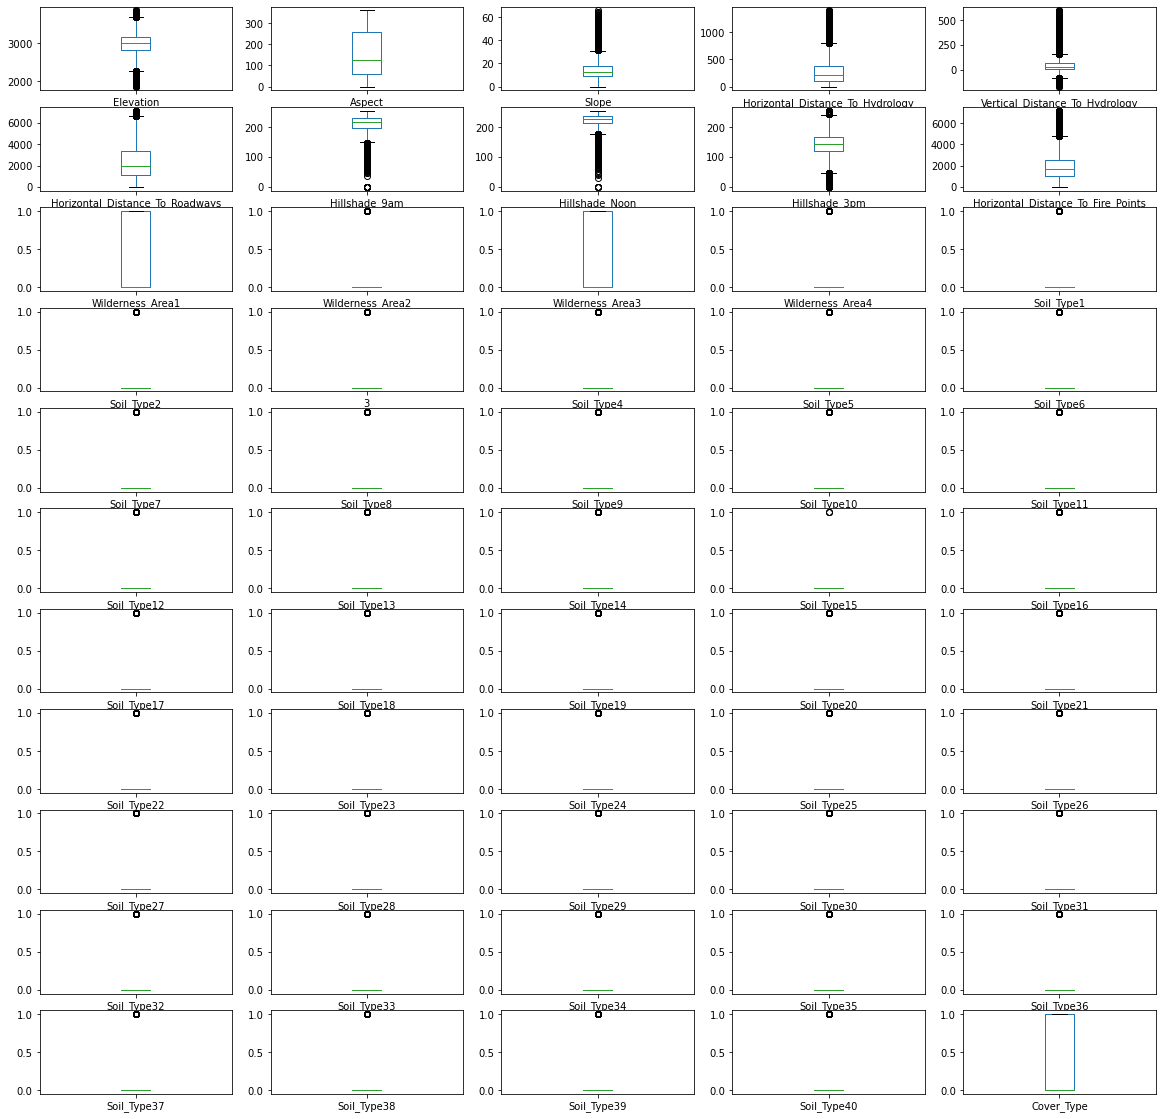

In [171]:
# Boxplots -- univariate analysis for continuous features 
cov_type.plot(kind='box', figsize=(20, 20), subplots=True, layout=(11, 5))
plt.show()

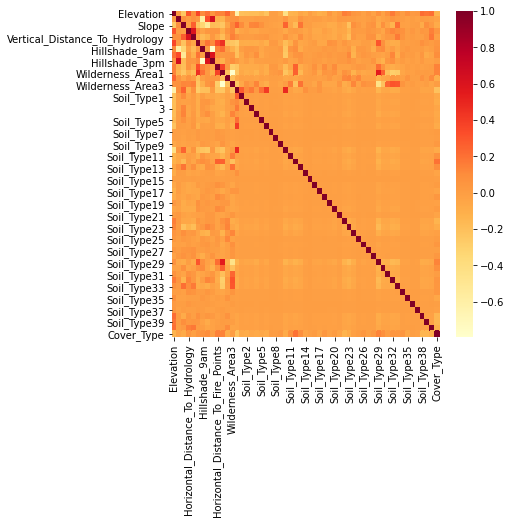

In [78]:
#here is a correlation matrix heatmap describing the weight of influence of each of the variables. 
corrMatrix = cov_type.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrMatrix, annot=False, cmap='YlOrRd')
plt.show()

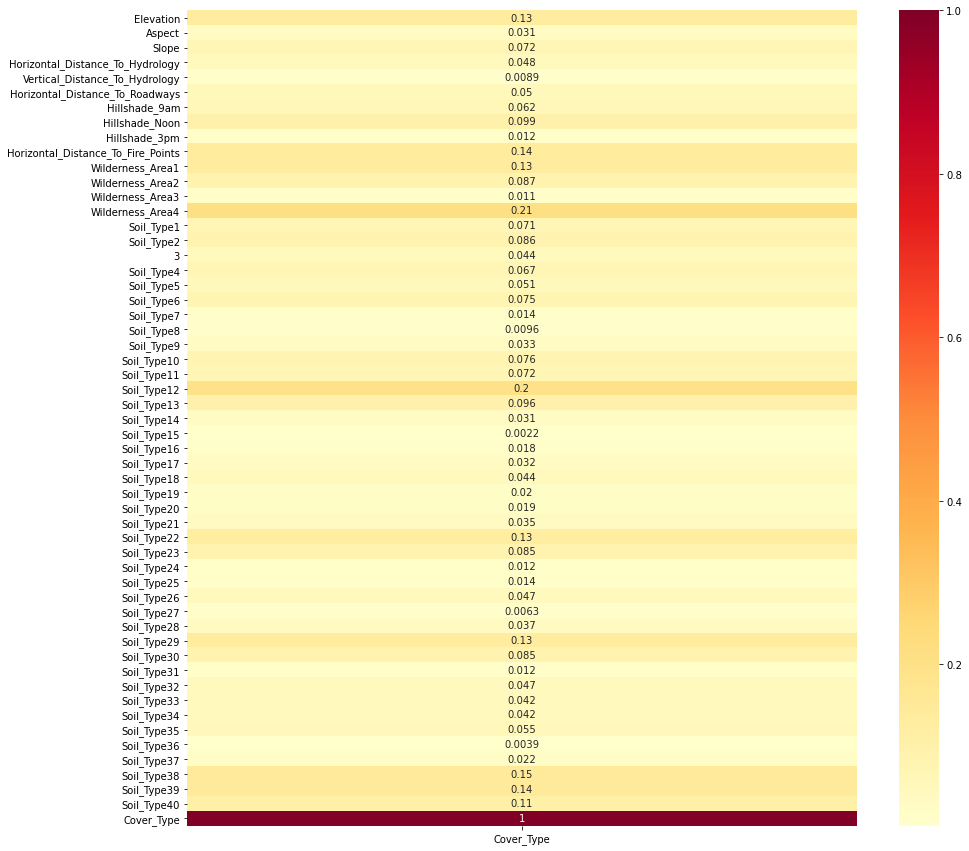

In [81]:
#here is another visualization of the above heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(abs(corrMatrix.Cover_Type.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

### Visualizing Letter Dataset

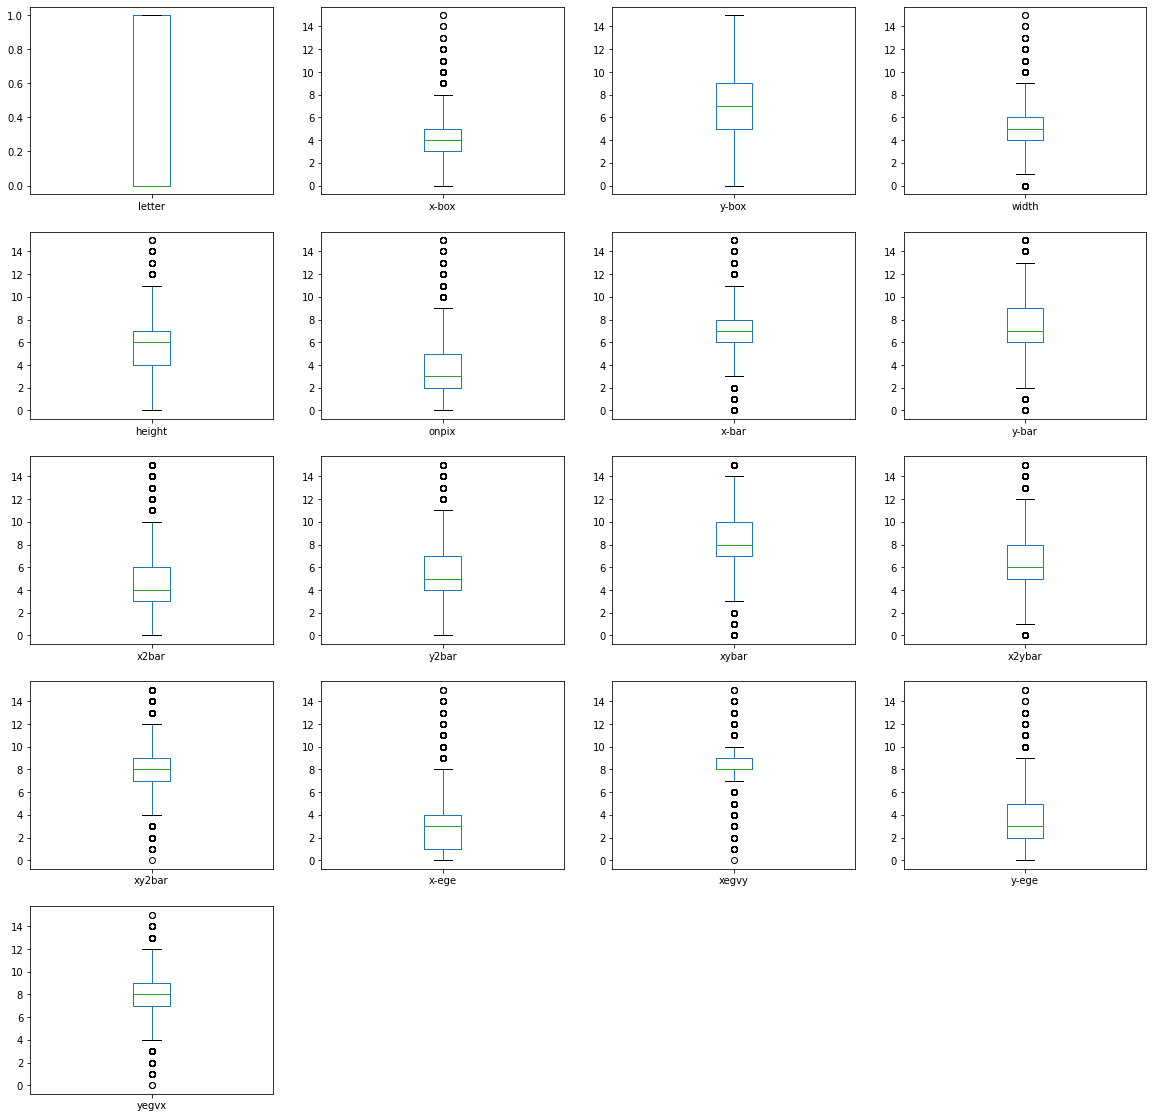

In [65]:
# Boxplots -- univariate analysis for continuous features 
letter_rec.plot(kind='box', figsize=(20, 20), subplots=True, layout=(5, 4))
plt.show()

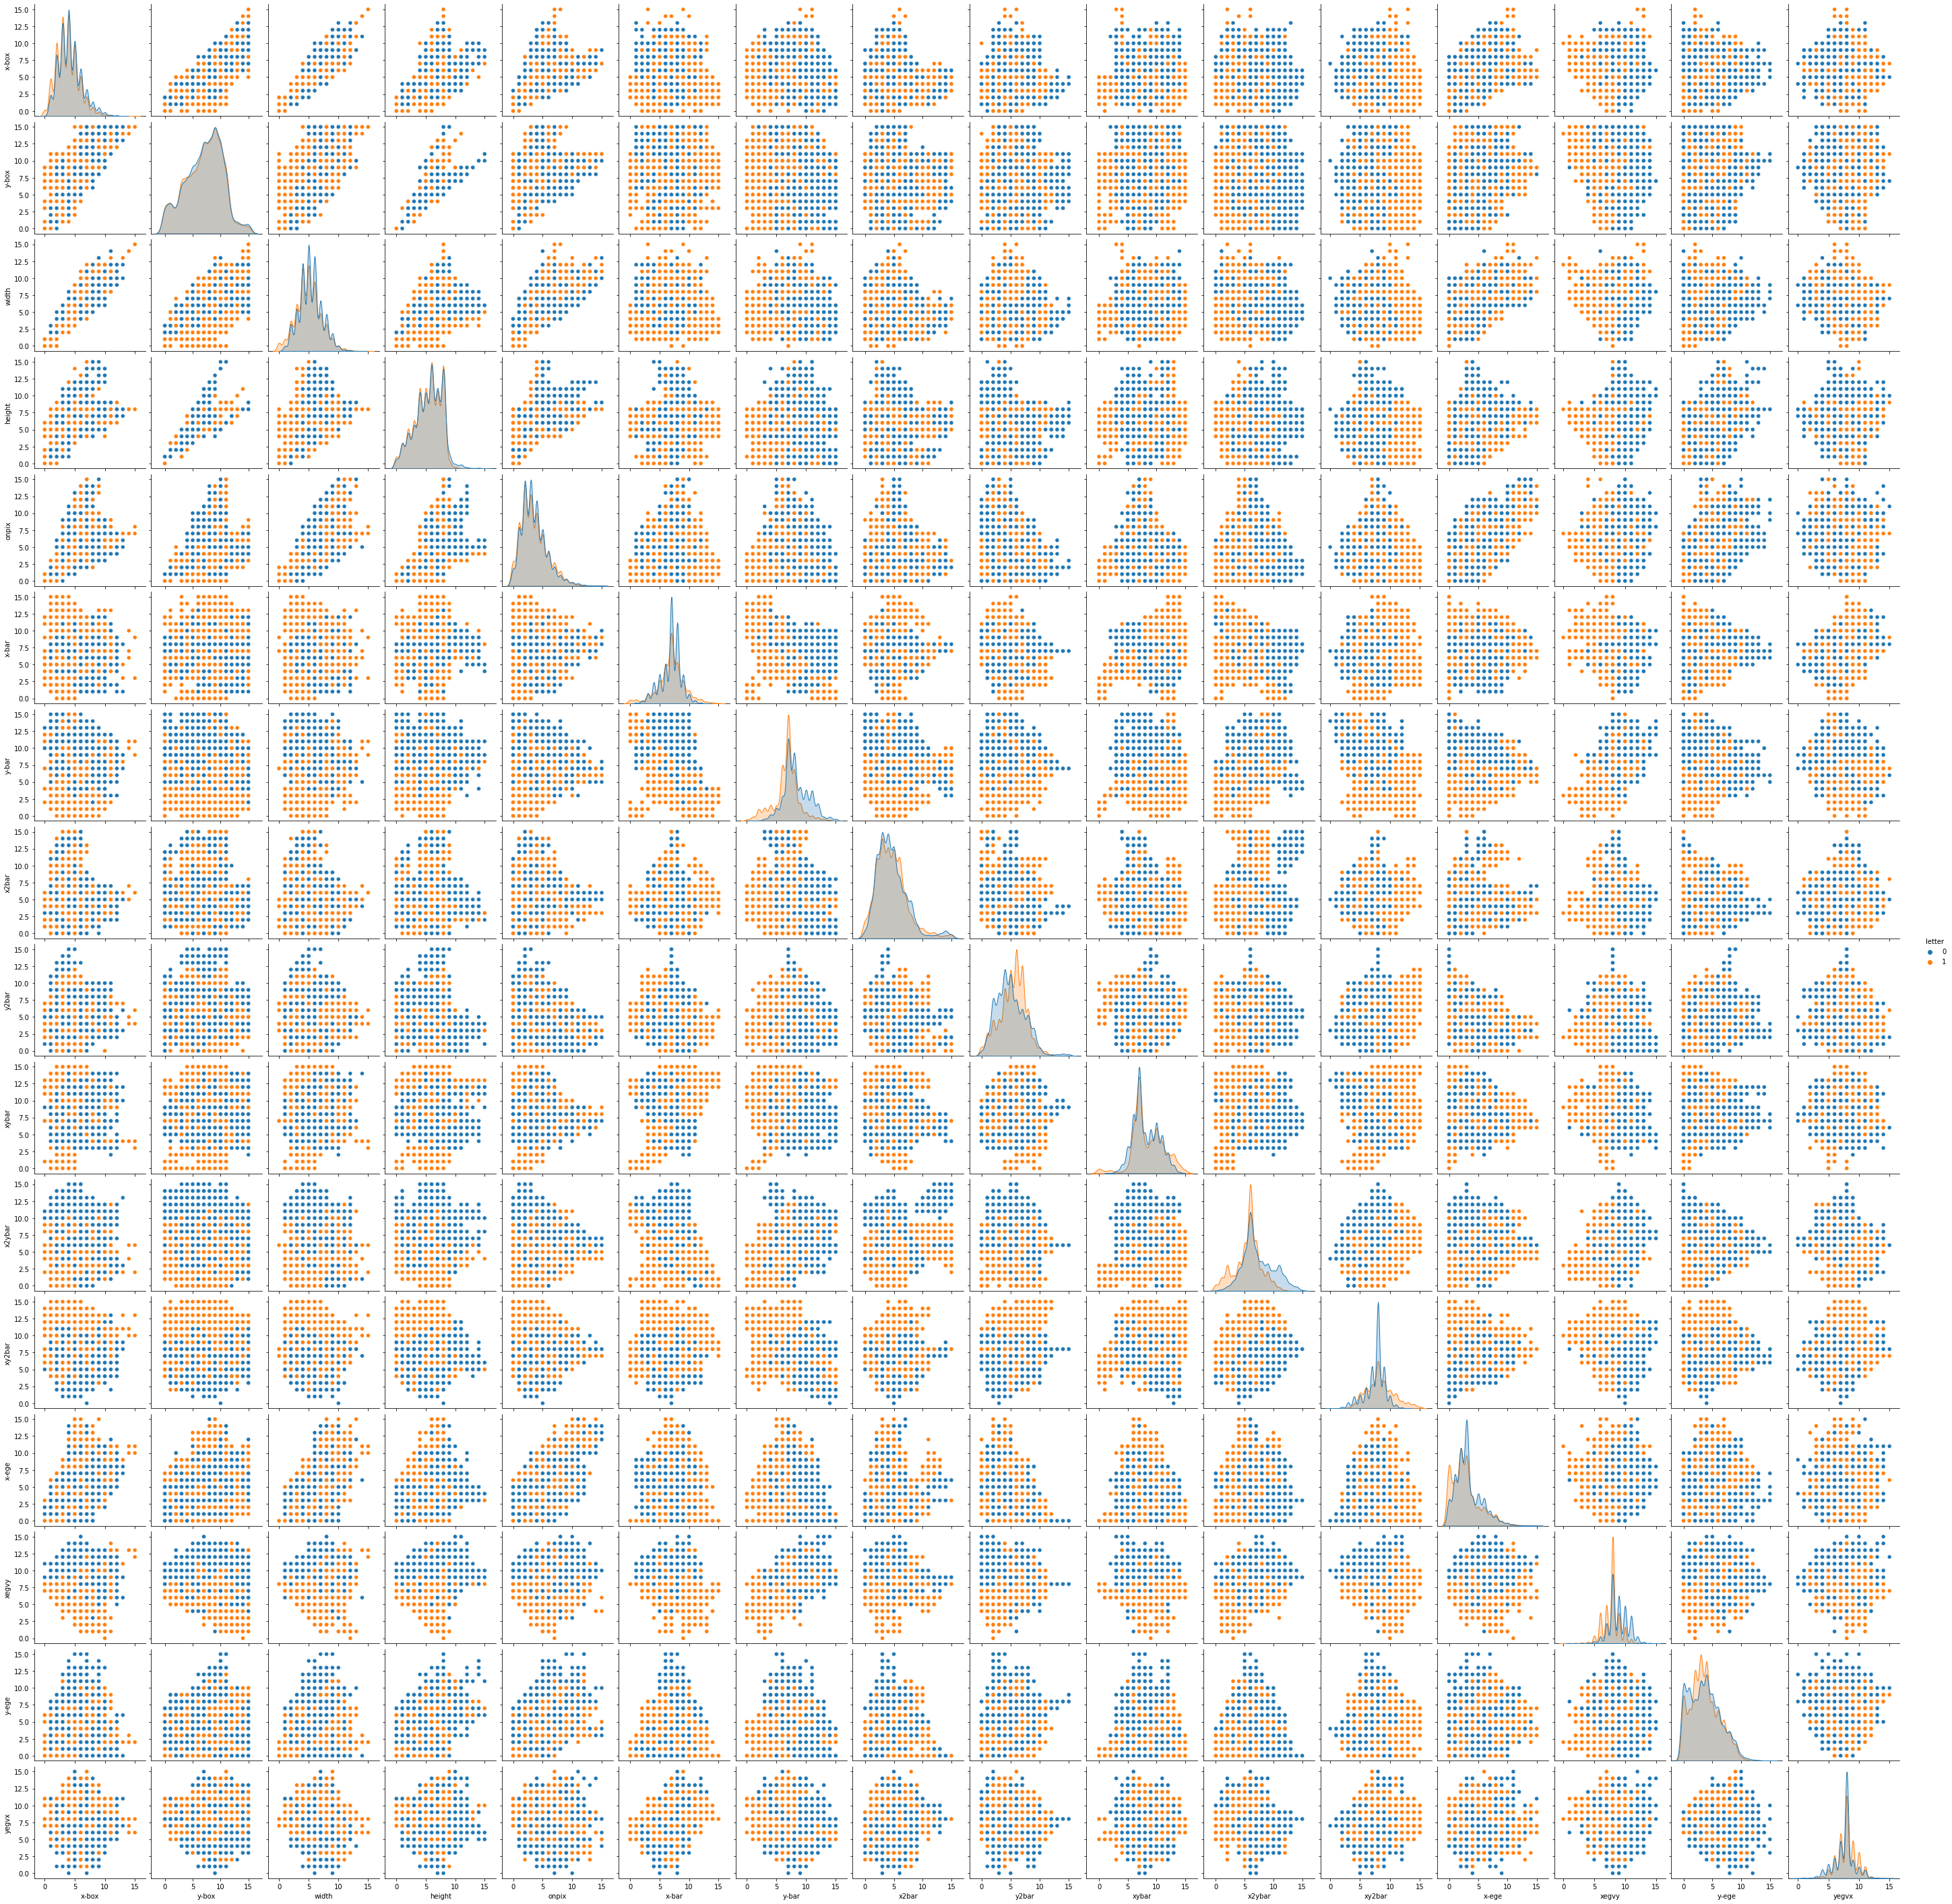

In [66]:
#Pair Grids were also created to understand the linearly separable data by plotting each feature against one another
sns.pairplot(letter_rec, hue='letter')
plt.show()

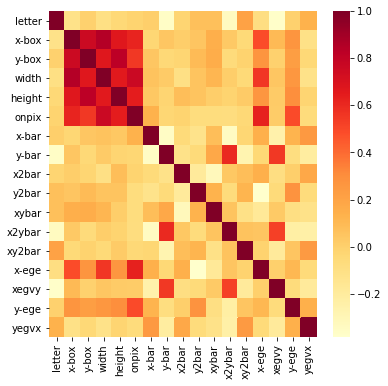

In [82]:
#here is a correlation matrix heatmap describing the weight of influence of each of the variables. 
corrMatrix = letter_rec.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrMatrix, annot=False, cmap='YlOrRd')
plt.show()

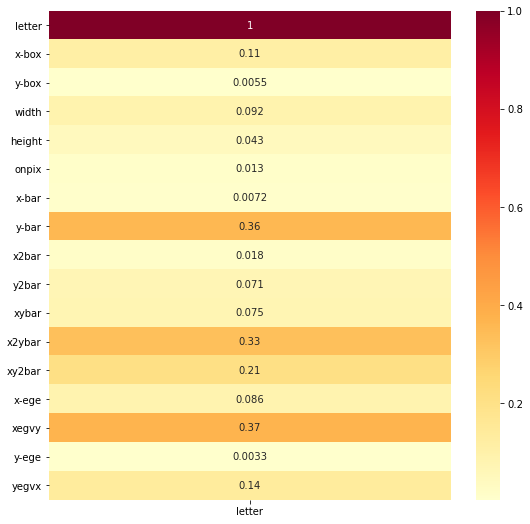

In [84]:
#here is another visualization of the above heatmap 
plt.figure(figsize=(9,9))
sns.heatmap(abs(corrMatrix.letter.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

### Visualizing Housing Dataset

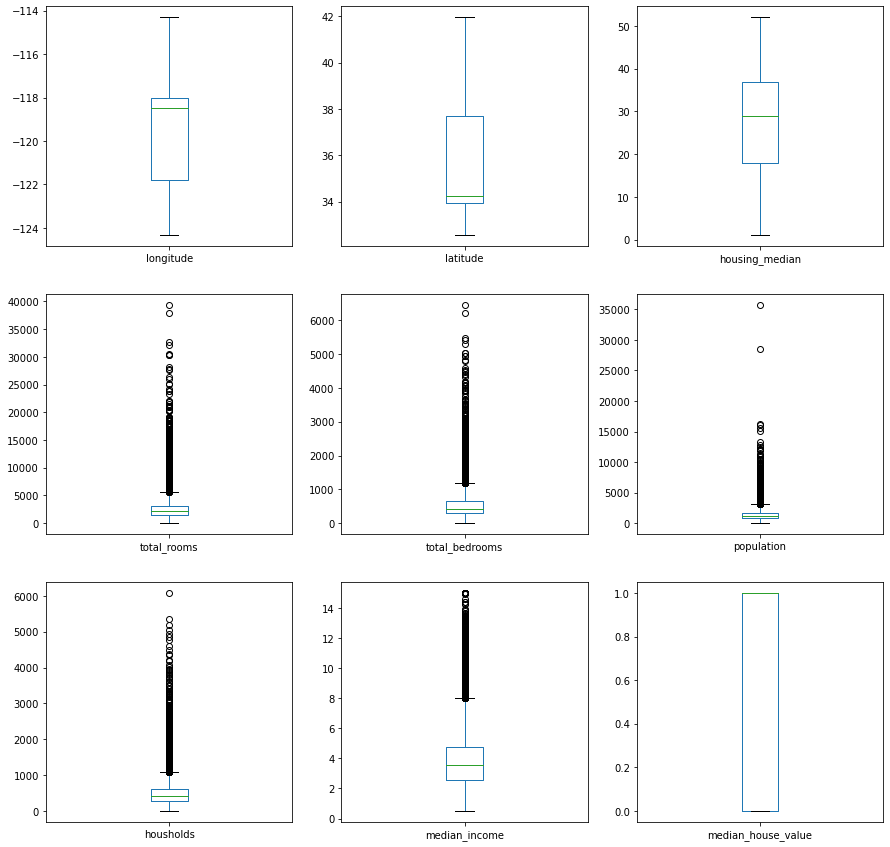

In [60]:
# Boxplots -- univariate analysis for continuous features 
housing.plot(kind='box', figsize=(15, 15), subplots=True, layout=(3, 3))
plt.show()

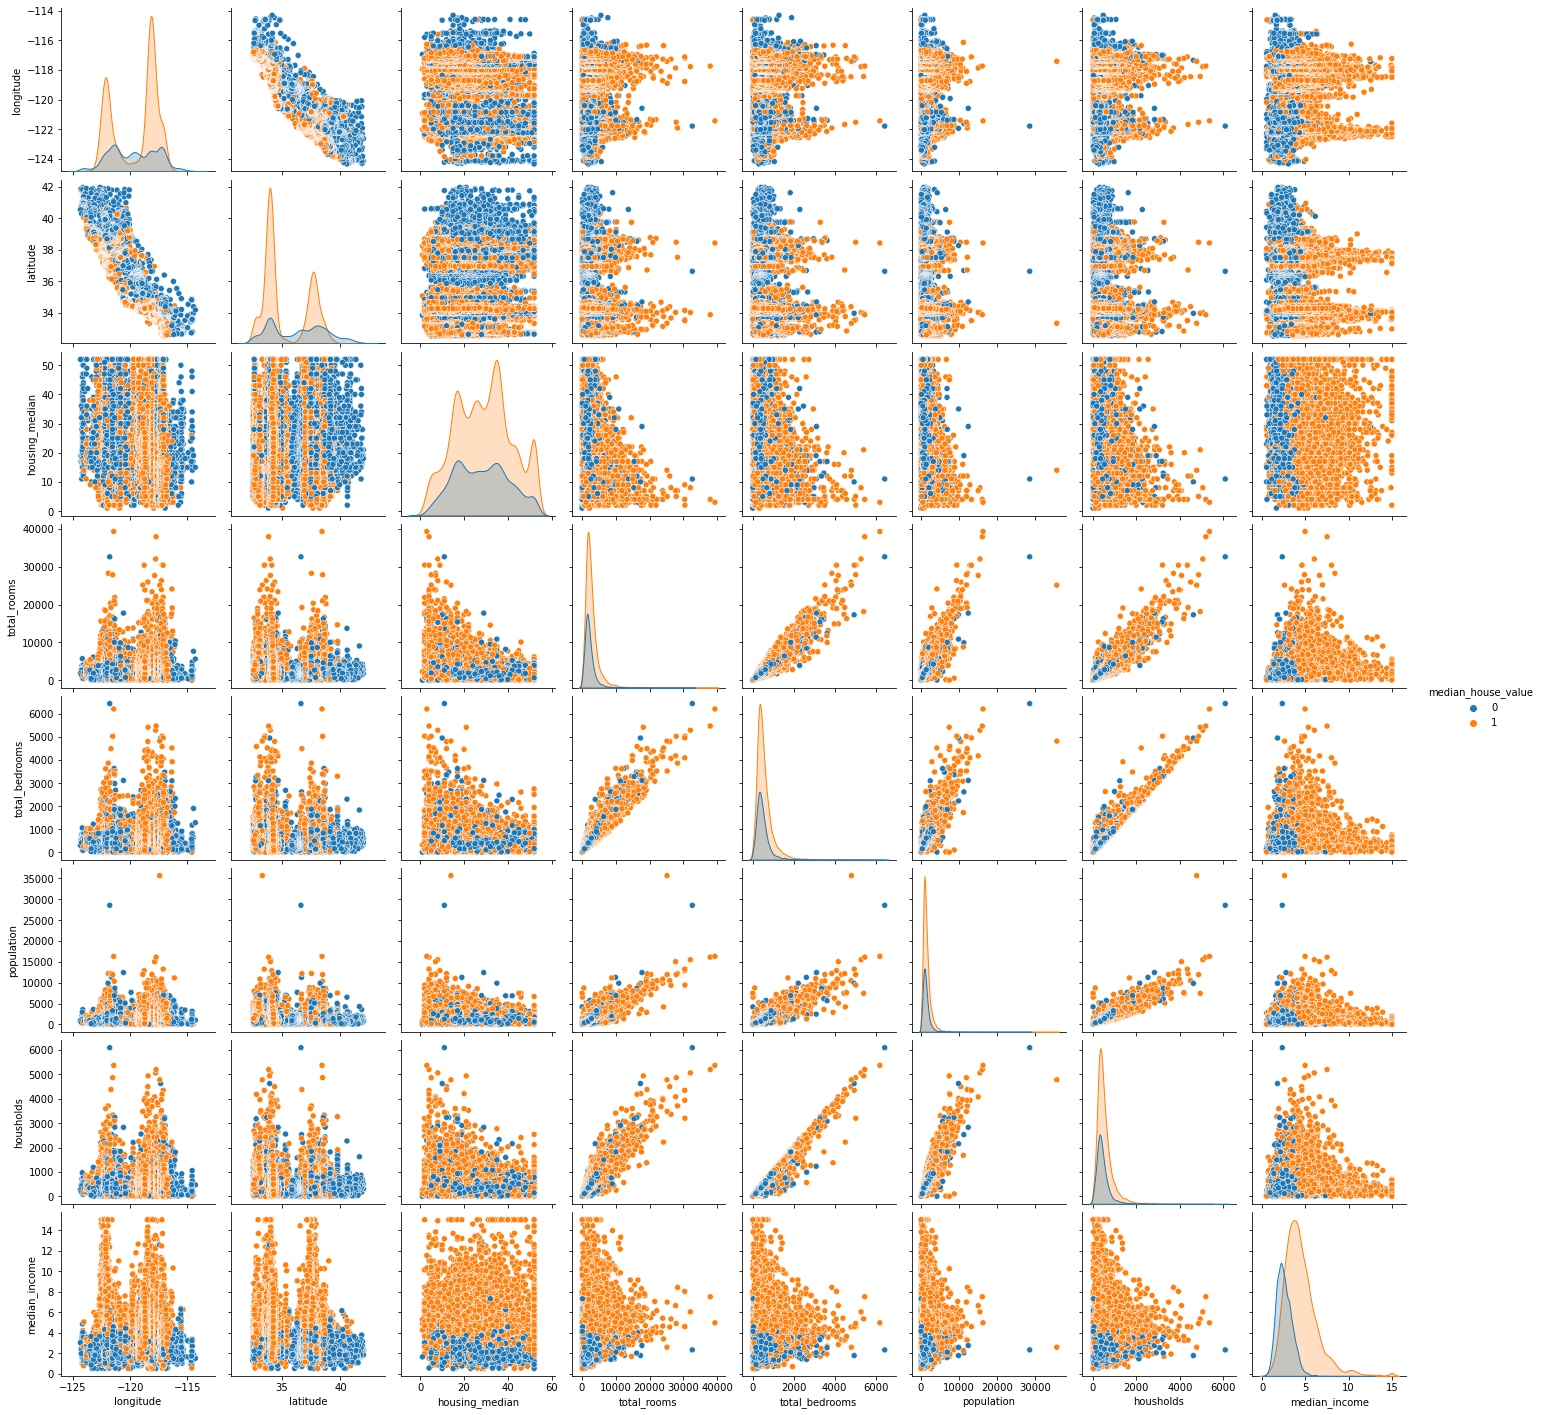

In [63]:
#Pair Grids were also created to understand the linearly separable data by plotting each feature against one another
sns.pairplot(housing, hue='median_house_value')
plt.show()

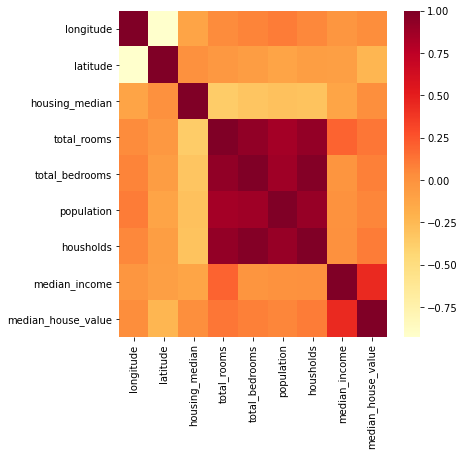

In [86]:
#here is a correlation matrix heatmap describing the weight of influence of each of the variables. 
corrMatrix = letter_rec.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrMatrix, annot=False, cmap='YlOrRd')
plt.show()

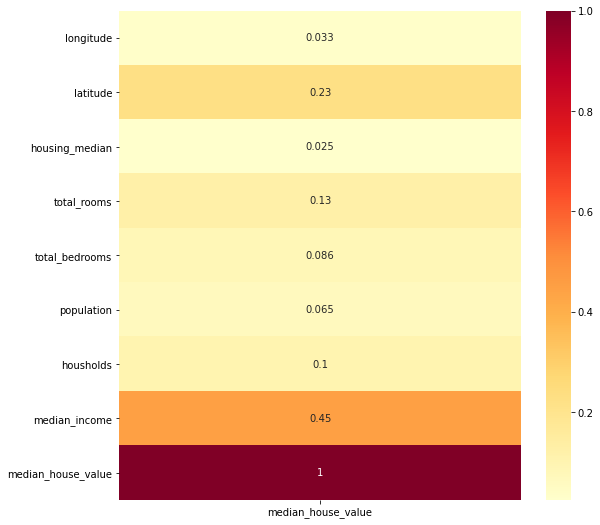

In [87]:
#here is another visualization of the above heatmap 
plt.figure(figsize=(9,9))
sns.heatmap(abs(corrMatrix.median_house_value.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

### Visualizing Nursery Dataset

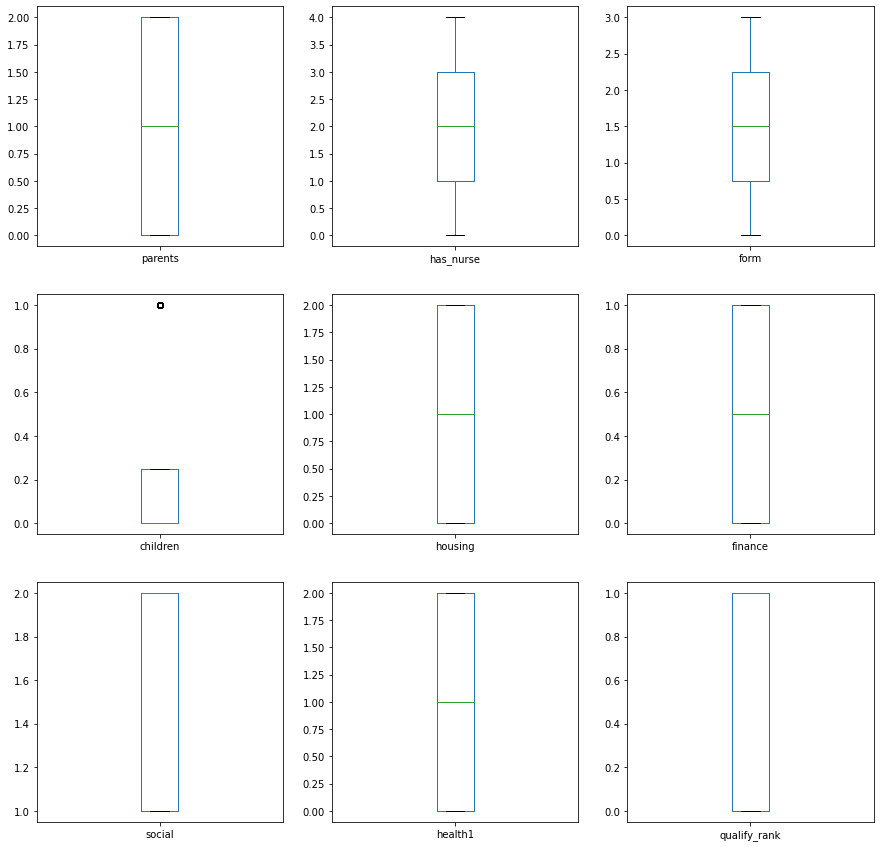

In [58]:
# Boxplots -- univariate analysis for continuous features 
nursery.plot(kind='box', figsize=(15, 15), subplots=True, layout=(3, 3))
plt.show()

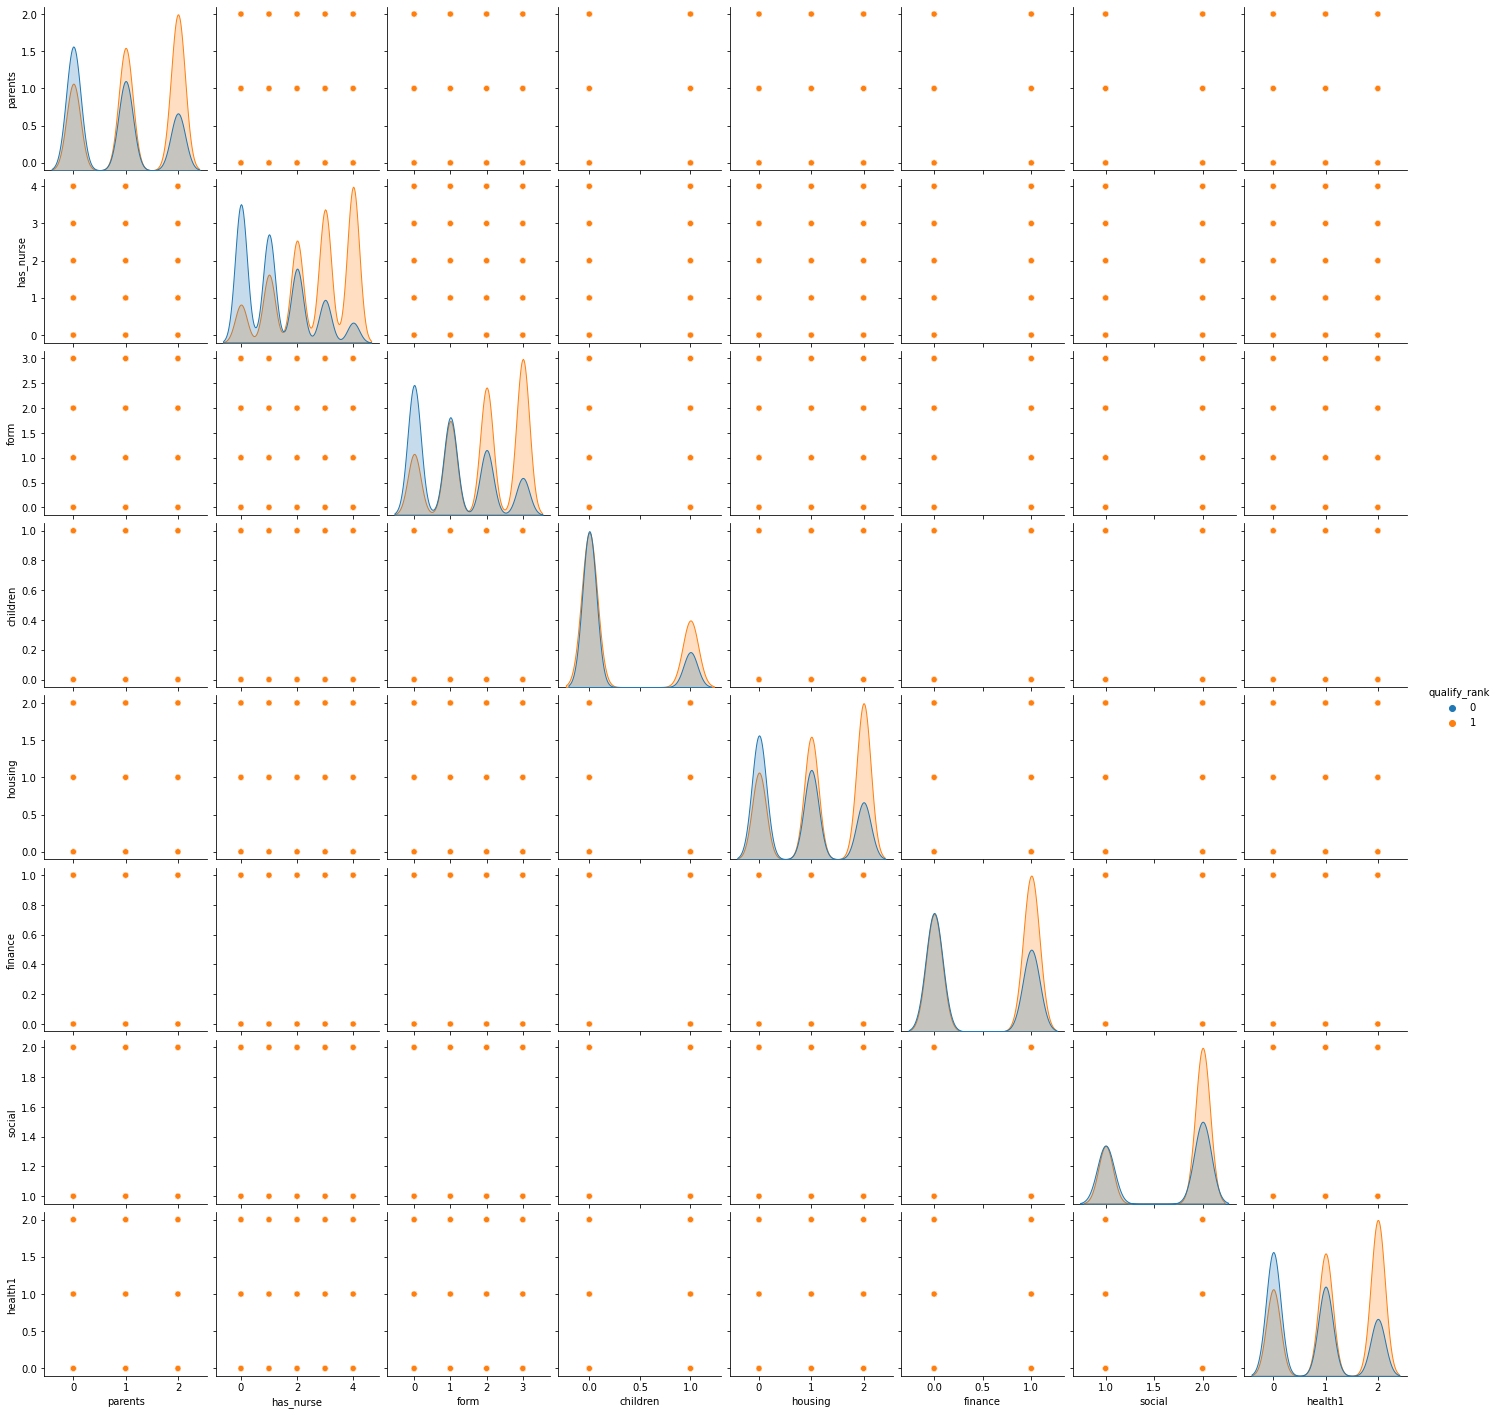

In [114]:
#Pair Grids were also created to understand the linearly separable data by plotting each feature against one another
sns.pairplot(nursery, hue='qualify_rank')
plt.show()

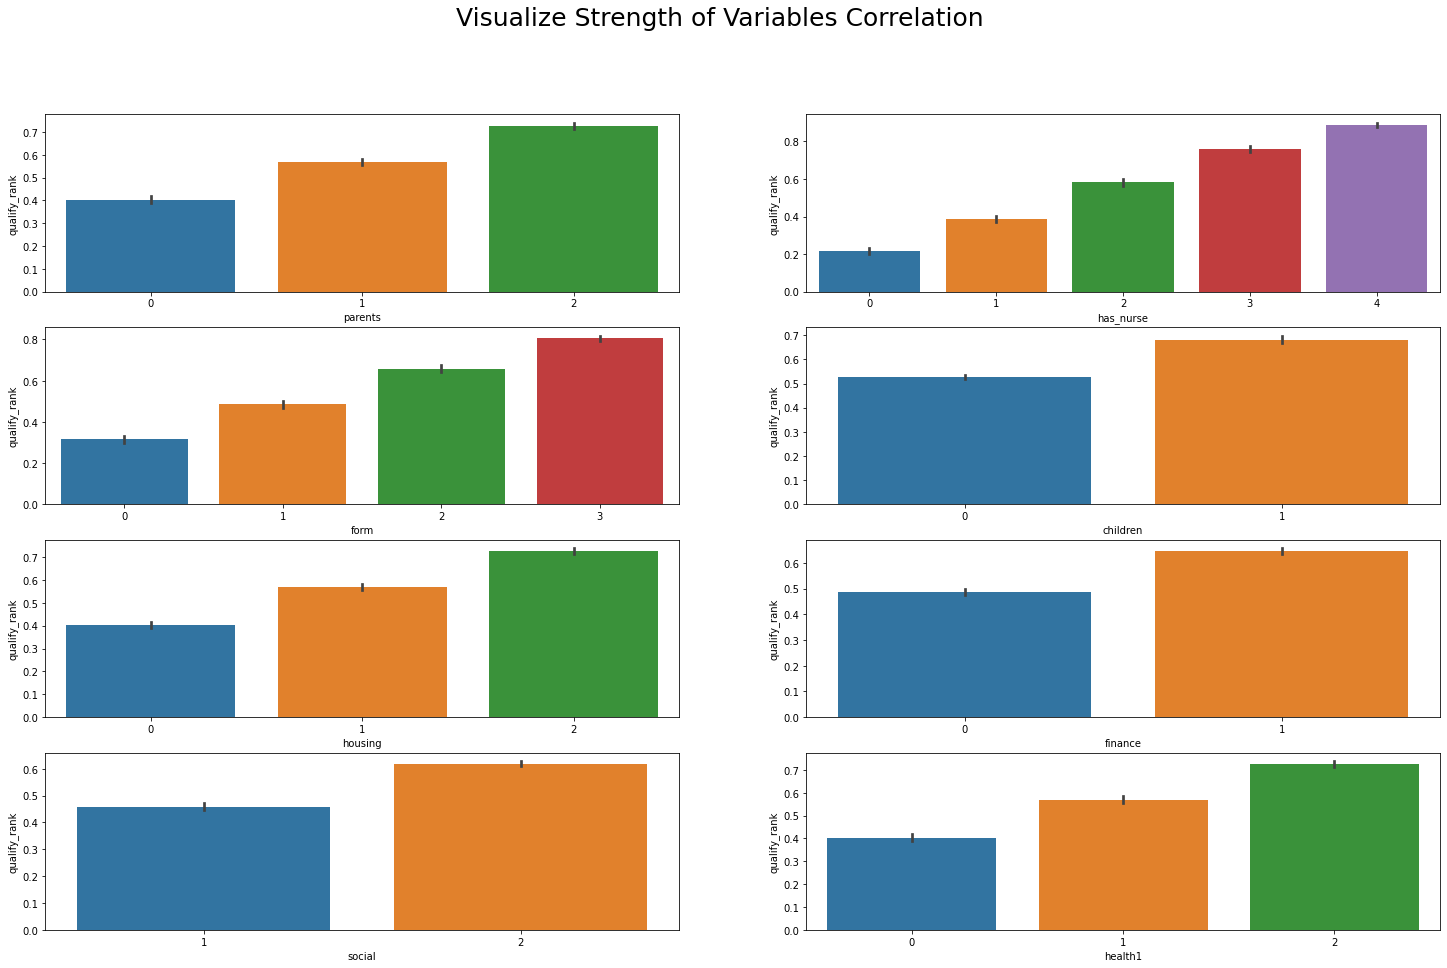

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(25, 15))

#setting a title for our subplots to better indicate what they represent 
fig.suptitle('Visualize Strength of Variables Correlation', fontsize = 25)

#specifying which exact x variable against qualify rank and plotting it in a bar graph format
sns.barplot(ax=axes[0, 0], data=nursery, x='parents', y='qualify_rank')
sns.barplot(ax=axes[0, 1], data=nursery, x='has_nurse', y='qualify_rank')
sns.barplot(ax=axes[1, 0], data=nursery, x='form', y='qualify_rank')
sns.barplot(ax=axes[1, 1], data=nursery, x='children', y='qualify_rank')
sns.barplot(ax=axes[2, 0], data=nursery, x='housing', y='qualify_rank')
sns.barplot(ax=axes[2, 1], data=nursery, x='finance', y='qualify_rank')
sns.barplot(ax=axes[3, 0], data=nursery, x='social', y='qualify_rank')
sns.barplot(ax=axes[3, 1], data=nursery, x='health1', y='qualify_rank')

plt.show()

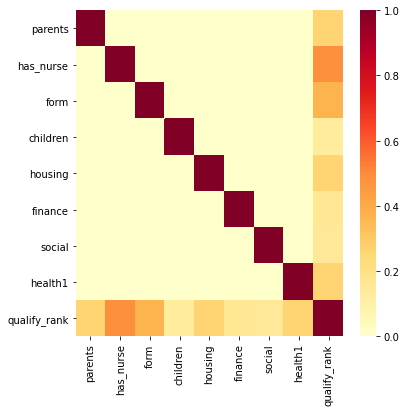

In [88]:
#here is a correlation matrix heatmap describing the weight of influence of each of the variables. 
corrMatrix = nursery.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrMatrix, annot=False, cmap='YlOrRd')
plt.show()

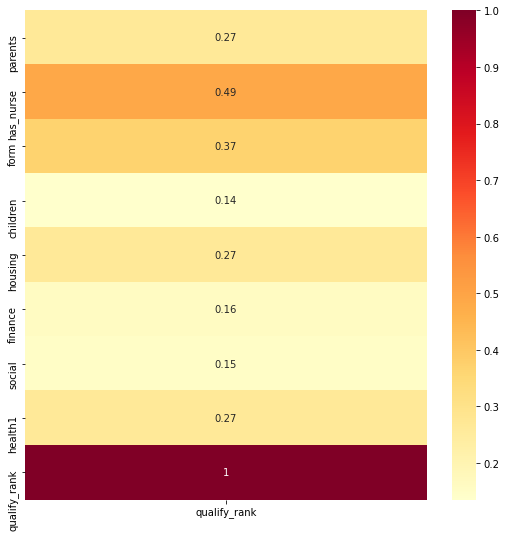

In [89]:
#here is another visualization of the above heatmap 
plt.figure(figsize=(9,9))
sns.heatmap(abs(corrMatrix.qualify_rank.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

In [127]:
#here I specified the x and y value columns associated with each dataframe

letter_X = letter_rec.iloc[:,1:]
letter_y = letter_rec.iloc[:,0]

housing_X = housing.iloc[:,:-1]
housing_y = housing.iloc[:,-1:]

covtype_X = cov_type.iloc[:,:-1]
covtype_y = cov_type.iloc[:,-1:]

nursery_X = nursery.iloc[:,:-1]
nursery_y = nursery.iloc[:,-1:]

#I then created an array of all x values and all y values to make zipping though each dataset 
#in the algorithms below a lot more doable

all_X = [letter_X, housing_X, covtype_X, nursery_X]
all_y = [letter_y, housing_y, covtype_y, nursery_y]

# Logistic Regression

In [42]:
#initializing arrays that would store the data to be placed in the table with reported data
train_metricsLR = []
test_metricsLR = []

#wrapping the code in this loop allows each of the four datasets to be iterated through
for X, y in zip(all_X, all_y):
    train_auc_valuesLR = []
    train_accuracy_valuesLR = []
    train_f1_valuesLR = []
    
    test_auc_valuesLR = []
    test_accuracy_valuesLR = []
    test_f1_valuesLR = []

    #this for loop ensures running the datasets for 5 trials each 
    for i in range(5):
        
        #using random selection, pick 5000 samples for training our model (with replacement)

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000)
  
        cvals = [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3, 10**4]
        scoring = {'Accuracy':'accuracy','AUC':'roc_auc','f1':'f1'}
        
        pipe = Pipeline([('std', StandardScaler()), ('classifier',LogisticRegression())])
        search_inside= [{'classifier': [LogisticRegression(solver='saga', max_iter=1000)],'classifier__C':cvals,
                         'classifier__penalty':['l2']},
            {'classifier':[LogisticRegression( max_iter=1000)], 'classifier__penalty':['none'],'classifier__C':cvals,
            'classifier__solver':['lbfgs','saga']}]
        
        
        
        search = GridSearchCV(pipe, search_inside,cv=StratifiedKFold(n_splits=5), scoring = scoring, refit=False, verbose=0)
        search.fit(X_train, y_train)

        print('Trial:',i+1)
        
        ans = pd.DataFrame(search.cv_results_['params'])

        ans['AUC'] = search.cv_results_['mean_test_AUC']
        auc_rank = search.cv_results_["rank_test_AUC"]
        auc_index = list(auc_rank).index(min(auc_rank))
        optimal_auc = search.cv_results_['params'][auc_index]

        ans["Accuracy"]=search.cv_results_['mean_test_Accuracy']
        accuracy_rank = search.cv_results_['rank_test_Accuracy']
        accuracy_index = list(accuracy_rank).index(min(accuracy_rank))
        optimal_accuracy = search.cv_results_['params'][accuracy_index]

        ans["f1"]=search.cv_results_['mean_test_f1']
        f1_rank = search.cv_results_['rank_test_f1']
        f1_index = list(f1_rank).index(min(f1_rank))
        optimal_f1 = search.cv_results_['params'][f1_index]
        
        #below we are making our predictions and fitting our models
        
        auc_model = LogisticRegression(penalty = optimal_auc['classifier__penalty'], C = optimal_auc["classifier__C"])
        auc_model.fit(X_train, y_train)
        
        auc_predict_train = auc_model.predict_proba(X_train)[:,1]
        auc_predict_test = auc_model.predict_proba(X_test)[:,1]
        
        auc_score_train = roc_auc_score(y_train, auc_predict_train)
        auc_score_test = roc_auc_score(y_test, auc_predict_test)
        
        train_auc_valuesLR.append(auc_score_train)
        test_auc_valuesLR.append(auc_score_test)

        accuracy_model = LogisticRegression(penalty = optimal_accuracy['classifier__penalty'], C = optimal_accuracy["classifier__C"])
        accuracy_model.fit(X_train, y_train)
        
        accuracy_score_train = accuracy_model.score(X_train, y_train)
        accuracy_score_test = accuracy_model.score(X_test, y_test)
        
        train_accuracy_valuesLR.append(accuracy_score_train)
        test_accuracy_valuesLR.append(accuracy_score_test)
        

        f1_model = LogisticRegression(penalty = optimal_f1['classifier__penalty'], C = optimal_f1["classifier__C"])
        f1_model.fit(X_train, y_train)
        
        f1_predict_train = f1_model.predict(X_train)
        f1_predict_test = f1_model.predict(X_test)
        
        F1_score_train = f1_score(y_train, f1_predict_train)
        F1_score_test = f1_score(y_test, f1_predict_test)

        train_f1_valuesLR.append(F1_score_train)
        test_f1_valuesLR.append(F1_score_test)

    #here I am calculating the means to put into the tables where to report results
    
    auc_mean_trainingLR = sum(train_auc_valuesLR)/len(train_auc_valuesLR)
    auc_mean_testingLR = sum(test_auc_valuesLR)/len(test_auc_valuesLR)
    
    accuracy_mean_trainingLR = sum(train_accuracy_valuesLR)/len(train_accuracy_valuesLR)
    accuracy_mean_testingLR = sum(test_accuracy_valuesLR)/len(test_accuracy_valuesLR)
    
    f1_mean_trainingLR = sum(train_f1_valuesLR)/len(train_f1_valuesLR)
    f1_mean_testingLR = sum(test_f1_valuesLR)/len(test_f1_valuesLR)
    
    metrics_LR_train = [auc_mean_trainingLR, accuracy_mean_trainingLR, f1_mean_trainingLR]
    metrics_LR_test = [auc_mean_testingLR, accuracy_mean_testingLR, f1_mean_testingLR]
    
    train_metricsLR.append(metrics_LR_train)
    test_metricsLR.append(metrics_LR_test)
    
    #below I am printing all of my results
    
    print('\n')
    
    print("AUC Train:", train_auc_valuesLR)
    print('Accuracy Train:', train_accuracy_valuesLR )
    print("F1 Train:", train_f1_valuesLR)
    
    print('\n')
    
    print("AUC Test:", test_auc_valuesLR)
    print('Accuracy Test:', test_accuracy_valuesLR )
    print("F1 Test:", test_f1_valuesLR)
    
    print('\n')
    
    print('Train Metrics:', metrics_LR_train)
    print('Test Metrics:', metrics_LR_test)
    
    print('\n')
    

    
print("Metrics Train -- Logistic Regression:\n", np.array(train_metricsLR))
print('\n')
print("Average Train Metrics -- Logistic Regression:", np.mean(np.array(train_metricsLR), axis=0) )
print('\n')
print("Metrics Test -- Logistic Regression:\n", np.array(test_metricsLR))
print('\n')
print("Average Test Metrics -- Logistic Regression:", np.mean(np.array(test_metricsLR), axis=0))
print('\n')
print("Average Across Test Metrics -- Logistic Regression:", np.mean(np.array(test_metricsLR), axis=1))

Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [0.8078491031094075, 0.8220391705069124, 0.8213386182682383, 0.8168742442940752, 0.8211638855448868]
Accuracy Train: [0.7284, 0.7372, 0.7346, 0.7268, 0.7308]
F1 Train: [0.7260992335619201, 0.7430582714118107, 0.7316280958181081, 0.7286452125546286, 0.7342022116903634]


AUC Test: [0.8154034571693842, 0.8087339003904445, 0.8105507505654771, 0.8106552200980135, 0.8086743712103956]
Accuracy Test: [0.7258666666666667, 0.7202, 0.7225333333333334, 0.7222, 0.7228]
F1 Test: [0.7233584499461788, 0.7265976157905022, 0.7229269595406597, 0.7240945507515062, 0.7250727320814598]


Train Metrics: [0.817853004344704, 0.73156, 0.7327266050073662]
Test Metrics: [0.8108035398867429, 0.72272, 0.7244100616220613]


Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [0.8604176420025582, 0.8663014538280307, 0.869660711462953, 0.8659902865468674, 0.8639295318364417]
Accuracy Train: [0.805, 0.8158, 0.8164, 0.8084, 0.8104]
F1 Train: [0.86896922456

# K Nearest Neighbors

In [128]:
#initializing arrays that would store the data to be placed in the table with reported data
train_metricsKNN = []
test_metricsKNN = []

#wrapping the code in this loop allows each of the four datasets to be iterated through
for X, y in zip(all_X, all_y):
    
    train_auc_valuesKNN = []
    train_accuracy_valuesKNN = []
    train_f1_valuesKNN = []
    
    test_auc_valuesKNN = []
    test_accuracy_valuesKNN = []
    test_f1_valuesKNN = [] 
    
#this for loop ensures running the datasets for 5 trials each 
    for i in range(5):
        #using random selection, pick 5000 samples for training our model (with replacement)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000)
        grid_params = {'n_neighbors': list(range(1,26)), 'weights': ['uniform', 'distance'],'p' :[1,2]}
        scoring = {'Accuracy':'accuracy','AUC':'roc_auc','f1':'f1'}
        search = GridSearchCV(KNeighborsClassifier(), param_grid = grid_params, scoring = scoring, refit=False,  cv=StratifiedKFold(n_splits = 5))
        search.fit(X_train, y_train)
        
        print("Trial:",i+1)

        ans = pd.DataFrame(search.cv_results_['params'])

        ans['AUC'] = search.cv_results_['mean_test_AUC']
        auc_rank = search.cv_results_["rank_test_AUC"]
        auc_index = list(auc_rank).index(min(auc_rank))
        optimal_auc = search.cv_results_['params'][auc_index]

        ans["Accuracy"]=search.cv_results_['mean_test_Accuracy']
        accuracy_rank = search.cv_results_['rank_test_Accuracy']
        accuracy_index = list(accuracy_rank).index(min(accuracy_rank))
        optimal_accuracy = search.cv_results_['params'][accuracy_index]

        ans["f1"]=search.cv_results_['mean_test_f1']
        f1_rank = search.cv_results_['rank_test_f1']
        f1_index = list(f1_rank).index(min(f1_rank))
        optimal_f1 = search.cv_results_['params'][f1_index]

        auc_model = KNeighborsClassifier(weights = optimal_auc['weights'], n_neighbors = optimal_auc["n_neighbors"])
        auc_model.fit(X_train, y_train)
        
        #below we are making our predictions and fitting our models
        
        auc_predict_train = auc_model.predict_proba(X_train)[:,1]
        auc_predict_test = auc_model.predict_proba(X_test)[:,1]
                            
        auc_score_train = roc_auc_score(y_train, auc_predict_train)
        auc_score_test = roc_auc_score(y_test, auc_predict_test)
        
        train_auc_valuesKNN.append(auc_score_train)
        test_auc_valuesKNN.append(auc_score_test)

        accuracy_model = KNeighborsClassifier(weights = optimal_accuracy['weights'], n_neighbors = optimal_accuracy["n_neighbors"])
        accuracy_model.fit(X_train, y_train)
        
        accuracy_score_train = accuracy_model.score(X_train, y_train)
        accuracy_score_test = accuracy_model.score(X_test, y_test)
        
        train_accuracy_valuesKNN.append(accuracy_score_train)
        test_accuracy_valuesKNN.append(accuracy_score_test)

        f1_model = KNeighborsClassifier(weights = optimal_f1['weights'], n_neighbors = optimal_f1["n_neighbors"])
        f1_model.fit(X_train, y_train)
        
        f1_predict_train = f1_model.predict(X_train)
        f1_predict_test = f1_model.predict(X_test)
        
        F1_score_train = f1_score(y_train, f1_predict_train)
        F1_score_test = f1_score(y_test, f1_predict_test)
        
        train_f1_valuesKNN.append(F1_score_train)
        test_f1_valuesKNN.append(F1_score_test)
        
    #here I am calculating the means to put into the tables where to report results

    auc_mean_trainingKNN = sum(train_auc_valuesKNN)/len(train_auc_valuesKNN)
    auc_mean_testingKNN = sum(test_auc_valuesKNN)/len(test_auc_valuesKNN)
    
    accuracy_mean_trainingKNN = sum(train_accuracy_valuesKNN)/len(train_accuracy_valuesKNN)
    accuracy_mean_testingKNN = sum(test_accuracy_valuesKNN)/len(test_accuracy_valuesKNN)
    
    f1_mean_trainingKNN = sum(train_f1_valuesKNN)/len(train_f1_valuesKNN)
    f1_mean_testingKNN = sum(test_f1_valuesKNN)/len(test_f1_valuesKNN)
    
    metrics_KNN_train = [auc_mean_trainingKNN, accuracy_mean_trainingKNN, f1_mean_trainingKNN]
    metrics_KNN_test = [auc_mean_testingKNN, accuracy_mean_testingKNN, f1_mean_testingKNN]
    
    train_metricsKNN.append(metrics_KNN_train)
    test_metricsKNN.append(metrics_KNN_test)
    
    #below I am printing all of my results
    
    print('\n')
    
    print("AUC Train:", train_auc_valuesKNN)
    print('Accuracy Train:', train_accuracy_valuesKNN)
    print("F1 Train:", train_f1_valuesKNN)
    
    print('\n')
    
    print("AUC Test:", test_auc_valuesKNN)
    print('Accuracy Test:', test_accuracy_valuesKNN)
    print("F1 Test:", test_f1_valuesKNN)
    
    print('\n')
    
    print('Train Metrics:', metrics_KNN_train)
    print('Test Metrics:', metrics_KNN_test)
    
    print('\n')

print("Metrics Train -- K Nearest Neighbors:\n", np.array(train_metricsKNN))
print('\n')
print("Average Train Metrics -- K Nearest Neighbors:", np.mean(np.array(train_metricsKNN), axis=0) )
print('\n')
print("Metrics Test -- K Nearest Neighbors:\n", np.array(test_metricsKNN))
print('\n')
print("Average Test Metrics -- K Nearest Neighbors:", np.mean(np.array(test_metricsKNN), axis=0))
print('\n')
print("Average Across Test Metrics -- K Nearest Neighbors:", np.mean(np.array(test_metricsKNN), axis=1))

Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Train: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 Train: [1.0, 1.0, 1.0, 1.0, 1.0]


AUC Test: [0.9911556011844348, 0.9901671156298292, 0.9920604303193663, 0.9904671029678108, 0.9907303139182286]
Accuracy Test: [0.9607333333333333, 0.9549333333333333, 0.9626, 0.9582666666666667, 0.9562]
F1 Test: [0.960793450043267, 0.9560211526875962, 0.9627316813924136, 0.9580260158240579, 0.9566157588863359]


Train Metrics: [1.0, 1.0, 1.0]
Test Metrics: [0.990916112803934, 0.9585466666666667, 0.9588376117667341]


Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Train: [1.0, 1.0, 0.7224, 1.0, 0.7274]
F1 Train: [1.0, 0.8359080403843815, 0.8263263263263263, 0.8235890932149652, 0.8302775024777008]


AUC Test: [0.6618649793586789, 0.6630405213462665, 0.6714163289095316, 0.6670596734547392, 0.659729405924671]
Accuracy Test: [0.7092071611253197, 0.7031969309462915, 0.7047314578005115,

# SVM 

In [39]:
#initializing arrays that would store the data to be placed in the table with reported data
train_metricsSVM = []
test_metricsSVM = []

#wrapping the code in this loop allows each of the four datasets to be iterated through
for X, y in zip(all_X, all_y):
    
    train_auc_valuesSVM = []
    train_accuracy_valuesSVM = []
    train_f1_valuesSVM = []
    
    test_auc_valuesSVM = []
    test_accuracy_valuesSVM = []
    test_f1_valuesSVM = [] 
    
    #this for loop ensures running the datasets for 5 trials each 
    for i in range(5):
#using random selection, pick 5000 samples for training our model (with replacement)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000)


        cvals = [1, 10]
        kernel=['linear', 'poly', 'rbf', 'sigmoid']
        gamma = ['scale', 'auto']
        degree= [3,5]

        scoring = {'Accuracy':'accuracy','AUC':'roc_auc','f1':'f1'}

        pipe = Pipeline([('std', StandardScaler()), ('classifier',SVC(probability=True))])

        search_inside= [{'classifier': [SVC(probability=True)],'classifier__C':cvals, 'classifier__kernel':['linear']},
                {'classifier':[SVC(probability=True)],'classifier__C':cvals,'classifier__kernel':['poly'], 'classifier__degree':degree},
                        {'classifier':[SVC(probability=True)],'classifier__C':cvals,'classifier__kernel':['rbf'], 'classifier__gamma':gamma}, 
                         {'classifier':[SVC(probability=True)],'classifier__C':cvals,'classifier__kernel':['sigmoid']},
                        {'classifier':[SVC(probability=True)],'classifier__C':cvals,'classifier__kernel':['precomputed']} ]

        search = GridSearchCV(pipe,search_inside, scoring = scoring, refit=False,  cv=StratifiedKFold(n_splits = 5))
        search.fit(X_train, y_train)

        print("Trial:",i+1)


        ans = pd.DataFrame(search.cv_results_['params'])

        ans['AUC'] = search.cv_results_['mean_test_AUC']
        auc_rank = search.cv_results_["rank_test_AUC"]
        auc_index = list(auc_rank).index(min(auc_rank))
        optimal_auc = search.cv_results_['params'][auc_index]

        ans["Accuracy"]=search.cv_results_['mean_test_Accuracy']
        accuracy_rank = search.cv_results_['rank_test_Accuracy']
        accuracy_index = list(accuracy_rank).index(min(accuracy_rank))
        optimal_accuracy = search.cv_results_['params'][accuracy_index]

        ans["f1"]=search.cv_results_['mean_test_f1']
        f1_rank = search.cv_results_['rank_test_f1']
        f1_index = list(f1_rank).index(min(f1_rank))
        optimal_f1 = search.cv_results_['params'][f1_index]

        #below we are making our predictions and fitting our models

        if(optimal_auc['classifier__kernel']=='linear'):
            auc_model = SVC(kernel = 'linear', C =optimal_auc['classifier__C'],probability = True)
        elif(optimal_auc['classifier__kernel'] =='poly'):
            auc_model = SVC(kernel = 'poly', C =optimal_auc['classifier__C'],degree = optimal_auc['classifier__degree'],probability = True)
        elif(optimal_auc['classifier__kernel'] =='rbf'):
            auc_model = SVC(kernel = 'rbf', C =optimal_auc['classifier__C'], gamma = optimal_auc['classifier__gamma'],probability = True)
        elif(optimal_auc['classifier__kernel'] =='sigmoid'):
            auc_model = SVC(kernel = 'sigmoid', C =optimal_auc['classifier__C'],probability = True)


        auc_model.fit(X_train, y_train)

        auc_predict_train = auc_model.predict(X_train)
        auc_predict_test = auc_model.predict(X_test)

        auc_score_train = roc_auc_score(y_train, auc_predict_train)
        auc_score_test = roc_auc_score(y_test, auc_predict_test)

        train_auc_valuesSVM.append(auc_score_train)
        test_auc_valuesSVM.append(auc_score_test)


        if(optimal_accuracy['classifier__kernel']=='linear'):
            accuracy_model = SVC(kernel = 'linear', C =optimal_accuracy['classifier__C'],probability = True)
        elif(optimal_accuracy['classifier__kernel'] =='poly'):
            accuracy_model = SVC(kernel = 'poly', C =optimal_accuracy['classifier__C'],degree = optimal_accuracy['classifier__degree'],probability = True)
        elif(optimal_accuracy['classifier__kernel'] =='rbf'):
            accuracy_model = SVC(kernel = 'rbf', C =optimal_accuracy['classifier__C'], gamma = optimal_accuracy['classifier__gamma'],probability = True)
        elif(optimal_accuracy['classifier__kernel'] =='sigmoid'):
            accuracy_model = SVC(kernel = 'sigmoid', C =optimal_accuracy['classifier__C'],probability = True)

        accuracy_model.fit(X_train, y_train)

        accuracy_score_train = accuracy_model.score(X_train, y_train)
        accuracy_score_test = accuracy_model.score(X_test, y_test)

        train_accuracy_valuesSVM.append(accuracy_score_train)
        test_accuracy_valuesSVM.append(accuracy_score_test)


        if(optimal_f1['classifier__kernel']=='linear'):
            f1_model = SVC(kernel = 'linear', C =optimal_f1['classifier__C'],probability = True)
        elif(optimal_f1['classifier__kernel'] =='poly'):
            f1_model = SVC(kernel = 'poly', C =optimal_f1['classifier__C'],degree = optimal_f1['classifier__degree'],probability = True)
        elif(optimal_f1['classifier__kernel'] =='rbf'):
            f1_model = SVC(kernel = 'rbf', C = optimal_f1['classifier__C'], gamma = optimal_accuracy['classifier__gamma'],probability = True)
        elif(optimal_f1['classifier__kernel'] =='sigmoid'):
            f1_model = SVC(kernel = 'sigmoid', C = optimal_f1['classifier__C'],probability = True)




        f1_model.fit(X_train, y_train)

        f1_model.fit(X_train, y_train)

        f1_predict_train = f1_model.predict(X_train)
        f1_predict_test = f1_model.predict(X_test)

        f1_score_train = metrics.f1_score(y_train, f1_predict_train)
        f1_score_test = metrics.f1_score(y_test, f1_predict_test)

        train_f1_valuesSVM.append(f1_score_train)
        test_f1_valuesSVM.append(f1_score_test)
    
    #here I am calculating the means to put into the tables where to report results
    
    auc_mean_trainingSVM = sum(train_auc_valuesSVM)/len(train_auc_valuesSVM)
    auc_mean_testingSVM = sum(test_auc_valuesSVM)/len(test_auc_valuesSVM)
    
    accuracy_mean_trainingSVM = sum(train_accuracy_valuesSVM)/len(train_accuracy_valuesSVM)
    accuracy_mean_testingSVM = sum(test_accuracy_valuesSVM)/len(test_accuracy_valuesSVM)
    
    f1_mean_trainingSVM = sum(train_f1_valuesSVM)/len(train_f1_valuesSVM)
    f1_mean_testingSVM = sum(test_f1_valuesSVM)/len(test_f1_valuesSVM)
    
    metrics_SVM_train = [auc_mean_trainingSVM, accuracy_mean_trainingSVM, f1_mean_trainingSVM]
    metrics_SVM_test = [auc_mean_testingSVM, accuracy_mean_testingSVM, f1_mean_testingSVM]
    
    train_metricsSVM.append(metrics_SVM_train)
    test_metricsSVM.append(metrics_SVM_test)
    
        
    #below I am printing all of my results
        
    print('\n')
    
    print("AUC Train:", train_auc_valuesSVM)
    print('Accuracy Train:', train_accuracy_valuesSVM)
    print("F1 Train:", train_f1_valuesSVM)
    
    print('\n')
    
    print("AUC Test:", test_auc_valuesSVM)
    print('Accuracy Test:', test_accuracy_valuesSVM)
    print("F1 Test:", test_f1_valuesSVM)
    
    print('\n')
    
    print('Train Metrics:', metrics_SVM_train)
    print('Test Metrics:', metrics_SVM_test)
    
    print('\n')

print("Metrics Train -- Support Vector Machine: \n ", np.array(train_metricsSVM))
print('\n')
print("Average Train Metrics -- Support Vector Machine:", np.mean(np.array(train_metricsSVM), axis=0) )
print('\n')
print("Metrics Test -- Support Vector Machine: \n ", np.array(test_metricsSVM))
print('\n')
print("Average Test Metrics -- Support Vector Machine:", np.mean(np.array(test_metricsSVM), axis=0))
print('\n')
print("Average Across Test Metrics -- Support Vector Machine:", np.mean(np.array(test_metricsSVM), axis=1))

Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [0.952248899559824, 0.9502012895781102, 0.9512496925725529, 0.9522398586186318, 0.9479966668714672]
Accuracy Train: [0.9522, 0.9502, 0.9514, 0.9522, 0.948]
F1 Train: [0.9513931258897702, 0.9500901984365604, 0.9498244889531282, 0.9516487962775642, 0.9481865284974095]


AUC Test: [0.9234138194023457, 0.9250363009238987, 0.9248825811997369, 0.9212094812411658, 0.9230017887169171]
Accuracy Test: [0.9234, 0.925, 0.9248666666666666, 0.9212, 0.923]
F1 Test: [0.9240932813635463, 0.9248948527939114, 0.9238050165641267, 0.9212210077312717, 0.9224051058112194]


Train Metrics: [0.9507872814401171, 0.9507999999999999, 0.9502286276108863]
Test Metrics: [0.9235087942968129, 0.9234933333333334, 0.9232838528528152]


Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [0.5006896551724138, 0.5007022471910112, 0.5006968641114983, 0.5003424657534247, 0.5003436426116838]
Accuracy Train: [0.7104, 0.7156, 0.7134, 0.7082, 0.7092]
F1 Train: [0.83

# Random Forests

In [49]:
#initializing arrays that would store the data to be placed in the table with reported data
train_metricsRF = []
test_metricsRF = []

#wrapping the code in this loop allows each of the four datasets to be iterated through
for X, y in zip(all_X, all_y):
    
    train_auc_valuesRF = []
    train_accuracy_valuesRF = []
    train_f1_valuesRF = []
    
    test_auc_valuesRF = []
    test_accuracy_valuesRF = []
    test_f1_valuesRF = [] 
    
    #this for loop ensures running the datasets for 5 trials each 
   
    for i in range(5):
        #using random selection, pick 5000 samples for training our model (with replacement)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000)
        grid_params = {'n_estimators':1024,'max_features': [1, 2, 4, 6, 8, 12, 16, 20],'max_depth' : [4,5,6,7,8]}
        scoring = {'Accuracy':'accuracy','AUC':'roc_auc','f1':'f1'}
        search = GridSearchCV(RandomForestClassifier(), param_grid = grid_params, scoring = scoring, refit=False,  cv=StratifiedKFold(n_splits = 5))
        search.fit(X_train, y_train)

        print('Trial:', i+1)
    
    
    
    
        ans = pd.DataFrame(search.cv_results_['params'])

        ans['AUC'] = search.cv_results_['mean_test_AUC']
        auc_rank = search.cv_results_["rank_test_AUC"]
        auc_index = list(auc_rank).index(min(auc_rank))
        optimal_auc = search.cv_results_['params'][auc_index]

        ans["Accuracy"]=search.cv_results_['mean_test_Accuracy']
        accuracy_rank = search.cv_results_['rank_test_Accuracy']
        accuracy_index = list(accuracy_rank).index(min(accuracy_rank))
        optimal_accuracy = search.cv_results_['params'][accuracy_index]

        ans["f1"]=search.cv_results_['mean_test_f1']
        f1_rank = search.cv_results_['rank_test_f1']
        f1_index = list(f1_rank).index(min(f1_rank))
        optimal_f1 = search.cv_results_['params'][f1_index]

        auc_model = RandomForestClassifier()
        auc_model.fit(X_train, y_train)
        
        auc_predict_train = auc_model.predict_proba(X_train)[:,1]
        auc_predict_test = auc_model.predict_proba(X_test)[:,1]
        
        auc_score_train = roc_auc_score(y_train, auc_predict_train)
        auc_score_test = roc_auc_score(y_test, auc_predict_test)
        
        train_auc_valuesRF.append(auc_score_train)
        test_auc_valuesRF.append(auc_score_test)
        
        #below we are making our predictions and fitting our models

        accuracy_model =  RandomForestClassifier()
        accuracy_model.fit(X_train, y_train)
        
        accuracy_score_train = accuracy_model.score(X_train, y_train)
        accuracy_score_test = accuracy_model.score(X_test, y_test)
        
        train_accuracy_valuesRF.append(accuracy_score_train)
        test_accuracy_valuesRF.append(accuracy_score_test)
        
        f1_model =  RandomForestClassifier()
        f1_model.fit(X_train, y_train)
        
        f1_predict_train = f1_model.predict(X_train)
        f1_predict_test = f1_model.predict(X_test)
        
        F1_score_train = f1_score(y_train, f1_predict_train)
        F1_score_test = f1_score(y_test, f1_predict_test)
        
        train_f1_valuesRF.append(F1_score_train)
        test_f1_valuesRF.append(F1_score_test)
    
    #here I am calculating the means to put into the tables where to report results
    
    auc_mean_trainingRF = sum(train_auc_valuesRF)/len(train_auc_valuesRF)
    auc_mean_testingRF = sum(test_auc_valuesRF)/len(test_auc_valuesRF)
    
    accuracy_mean_trainingRF = sum(train_accuracy_valuesRF)/len(train_accuracy_valuesRF)
    accuracy_mean_testingRF = sum(test_accuracy_valuesRF)/len(test_accuracy_valuesRF)
    
    f1_mean_trainingRF = sum(train_f1_valuesRF)/len(train_f1_valuesRF)
    f1_mean_testingRF = sum(test_f1_valuesRF)/len(test_f1_valuesRF)
    
    metrics_RF_train = [auc_mean_trainingRF, accuracy_mean_trainingRF, f1_mean_trainingRF]
    metrics_RF_test = [auc_mean_testingRF, accuracy_mean_testingRF, f1_mean_testingRF]
    
    train_metricsRF.append(metrics_RF_train)
    test_metricsRF.append(metrics_RF_test)
    
    #below I am printing all of my results
    
    print('\n')

    print("AUC Train:", train_auc_valuesRF)
    print('Accuracy Train:', train_accuracy_valuesRF )
    print("F1 Train:", train_f1_valuesRF)

    print('\n')

    print("AUC Test:", test_auc_valuesRF)
    print('Accuracy Test:', test_accuracy_valuesRF)
    print("F1 Test:", test_f1_valuesRF)

    print('\n')

    print('Train Metrics:', metrics_RF_train)
    print('Test Metrics:', metrics_RF_test)

    print('\n')


    
print("Metrics Train -- Random Forests:", np.array(train_metricsRF))
print('\n')
print("Average Train Metrics -- Random Forests:", np.mean(np.array(train_metricsRF), axis=0) )
print('\n')
print("Metrics Test -- Random Forests:", np.array(test_metricsRF))
print('\n')
print("Average Test Metrics -- Random Forests:", np.mean(np.array(test_metricsRF), axis=0))
print('\n')
print("Average Across Test Metrics -- Random Forests:", np.mean(np.array(test_metricsRF), axis=1))

        

Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy Train: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 Train: [1.0, 1.0, 1.0, 1.0, 1.0]


AUC Test: [0.9902058309369925, 0.9893591103841155, 0.9894398844468738, 0.9892397685604091, 0.9893066902916807]
Accuracy Test: [0.9448666666666666, 0.9432666666666667, 0.9420666666666667, 0.9441333333333334, 0.9424666666666667]
F1 Test: [0.9453792735042735, 0.9426947509194249, 0.9401306485285205, 0.9418799973123699, 0.942878091048457]


Train Metrics: [1.0, 1.0, 1.0]
Test Metrics: [0.9895102569240144, 0.94336, 0.9425925522626091]


Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5


AUC Train: [1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999]
Accuracy Train: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 Train: [1.0, 0.999860002799944, 1.0, 1.0, 1.0]


AUC Test: [0.9515505423407102, 0.9491572601551462, 0.9543479768586718, 0.9486080745901005, 0.9564914765588436]
Accuracy Test: [0.8941815856777494, 0.8895780051150896, 0.894309462915601, 0.88829

# Tables

## Table 1) 
### Data Exploration

In [100]:
data_explore = pd.DataFrame(np.array([[20000, 5000, 15000, 0.497], 
                                      [20640, 5000, 15640, 0.714 ],
                                      [581012, 5000, 576012, 0.488], 
                                      [12960, 5000, 7960, 0.566]]),
                            columns=['Attributes', 'Train Size', 'Test Size', 'Positive Ratio'], index=['Letter', 'Housing', 'Covertype',
                                                                                                'Nursery'])

data_explore

Attributes  Train Size  Test Size  Positive Ratio
Letter        20000.0      5000.0    15000.0           0.497
Housing       20640.0      5000.0    15640.0           0.714
Covertype    581012.0      5000.0   576012.0           0.488
Nursery       12960.0      5000.0     7960.0           0.566

## Table 2)
### Mean Test Set Performance

In [4]:
mean_test_performance = pd.DataFrame(np.array([[0.81805456, 0.78008214, 0.79014486], 
                                      [0.87889894, 0.85418392, 0.88281856],
                                      [ 0.78772197, 0.83047591, 0.83495811], 
                                      [ 0.95858559, 0.90154233, 0.91032453]]),
                            columns=['AUC', 'Accuracy', 'F1'],index=['Logistic Regression',
                                                                         'K Nearest Neighbors',
                                                                         'Support Vector Machines',
                                                                         'Random Forests'])


mean_test_performance 

AUC  Accuracy        F1
Logistic Regression      0.818055  0.780082  0.790145
K Nearest Neighbors      0.878899  0.854184  0.882819
Support Vector Machines  0.787722  0.830476  0.834958
Random Forests           0.958586  0.901542  0.910325

## Table 3)
### Average Across Metrics

In [160]:
#row = model, col = dataset
table3 = pd.DataFrame(np.array([[0.75264453, 0.8503328, 0.61916663, 0.96223145], 
                                      [0.96943346, 0.72732443, 0.80765569, 0.98345498],
                                      [0.92342866, 0.68256842, 0.66487758, 1], 
                                      [0.9584876, 0.92316914, 0.84427921, 0.96798732]]),
                            columns=['Letter', 'Housing', 'Covertype', 'Nursery'],index=['Logistic Regression','K Nearest Neighbors',
                                                                              'Support Vector Machines','Random Forests'])

table3

Letter   Housing  Covertype   Nursery
Logistic Regression      0.752645  0.850333   0.619167  0.962231
K Nearest Neighbors      0.969433  0.727324   0.807656  0.983455
Support Vector Machines  0.923429  0.682568   0.664878  1.000000
Random Forests           0.958488  0.923169   0.844279  0.967987

# Secondary Results 

## Training Set Performance

In [101]:
mean_train_performance = pd.DataFrame(np.array([[0.81853056, 0.78206, 0.79226386], 
                                      [1, 0.97249, 0.96580505],
                                      [ 0.79626958, 0.86214, 0.89210234], 
                                      [1, 1, 0.999993]]),
                            columns=['AUC', 'Accuracy', 'F1'],index=['Logistic Regression',
                                                                         'K Nearest Neighbors',
                                                                         'Support Vector Machines',
                                                                         'Random Forests'])


mean_train_performance 

AUC  Accuracy        F1
Logistic Regression      0.818531   0.78206  0.792264
K Nearest Neighbors      1.000000   0.97249  0.965805
Support Vector Machines  0.796270   0.86214  0.892102
Random Forests           1.000000   1.00000  0.999993

## Raw Test Scores

In [113]:
#Raw data for Logistic Regression
auc1LR= [0.8154034571693842, 0.8087339003904445, 0.8105507505654771, 0.8106552200980135, 0.8086743712103956]
acc1LR=[0.7258666666666667, 0.7202, 0.7225333333333334, 0.7222, 0.7228]
f11LR=[0.7233584499461788, 0.7265976157905022, 0.7229269595406597, 0.7240945507515062, 0.7250727320814598]

auc2LR=[0.8664089245372235, 0.8669175650166737, 0.8695253809607133, 0.866705879729978, 0.8681308162979084]
acc2LR=[0.8093989769820972, 0.8095268542199489, 0.8134910485933504, 0.8089514066496164, 0.8111892583120205]
f12LR=[0.8726993210061067, 0.8722500964878426, 0.8748659431169833, 0.8720232996402261, 0.8729072519905315]

auc3LR=[0.6578610550624658, 0.6622093435492235, 0.662813986338479, 0.6576020045845962, 0.6652175218390237]
acc3LR=[0.605829392443213, 0.6188829399387513, 0.6116487156517573, 0.6098241008867871, 0.6117876016471879]
f13LR= [0.5726375653763477, 0.6062452097629079, 0.573808688728162, 0.5779528801120721, 0.5931784586747452]

auc4LR=[0.9211624674393009, 0.9270318787634255, 0.9194057778542912, 0.9689759141756537, 0.9271049510654866]
acc4LR=[0.9753768844221106, 0.975, 0.9709798994974874, 0.9742462311557789, 0.9819095477386934]
f14LR=[0.9785370127025843, 0.9779256794231835, 0.9743418860379872, 0.9774452635053361, 0.9840283939662822]

#Raw data for KNN
auc1knn= [0.9911556011844348, 0.9901671156298292, 0.9920604303193663, 0.9904671029678108, 0.9907303139182286]
acc1knn=  [0.9607333333333333, 0.9549333333333333, 0.9626, 0.9582666666666667, 0.9562]
f11knn= [0.960793450043267, 0.9560211526875962, 0.9627316813924136, 0.9580260158240579, 0.9566157588863359]

auc2knn= [0.6618649793586789, 0.6630405213462665, 0.6714163289095316, 0.6670596734547392, 0.659729405924671]
acc2knn=  [0.7092071611253197, 0.7031969309462915, 0.7047314578005115, 0.69769820971867, 0.6955882352941176]
f12knn= [0.8199382373901338, 0.8181889271191741, 0.8156928480204343, 0.8094835567363041, 0.8130300388364904]

auc3knn=  [0.8617700324167259, 0.8619682035556946, 0.8611315175657902, 0.8611398968674164, 0.8622341500550901]
acc3knn=  [0.7838604056859927, 0.7851207960945258, 0.7804438101983986, 0.7759022381478163, 0.7822059262654251]
f13knn=  [0.7809053521116847, 0.780556107077805, 0.7782373952490087, 0.7764915868994889, 0.782867863917697]

auc4knn=  [0.9983241843220086, 0.9989959022660643, 0.9977089596355337, 0.9989550073616863, 0.9980594751785183]
acc4knn=  [0.971608040201005, 0.9797738693467337, 0.9680904522613065, 0.981532663316583, 0.9719849246231156]
f14knn=  [0.974469046543154, 0.9820412716118239, 0.9715501792114695, 0.983733539891557, 0.9749971969951788]

#Raw data for SVM
auc1svm= [0.9234138194023457, 0.9250363009238987, 0.9248825811997369, 0.9212094812411658, 0.9230017887169171]
acc1svm=  [0.9234, 0.925, 0.9248666666666666, 0.9212, 0.923]
f11svm=  [0.9240932813635463, 0.9248948527939114, 0.9238050165641267, 0.9212210077312717, 0.9224051058112194]

auc2svm=  [0.49991053855788153, 0.5, 0.5, 0.5, 0.5]
acc2svm=  [0.7145780051150895, 0.7130434782608696, 0.7137468030690537, 0.7153452685421995, 0.7150255754475703]
f12svm=  [0.8335322195704058, 0.8324873096446701, 0.8329664589784725, 0.8340539734605635, 0.8338366327405584]

auc3svm=  [0.7267294128569504, 0.724606462711618, 0.7306683485154271, 0.726550745359477, 0.7284298896723738]
acc3svm=  [0.7254241231085463, 0.7243321319694729, 0.7299500704846427, 0.5124007833170142, 0.7282053151670451]
f13svm=  [0.7345448075957992, 0.7224548867712142, 0.732877229858292, 0.0002135816576072447, 0.7257759117477566]

auc4svm=  [1.0, 1.0, 1.0, 1.0, 1.0]
acc4svm=  [1.0, 1.0, 1.0, 1.0, 1.0]
f14svm=  [1.0, 1.0, 1.0, 1.0, 1.0]

#raw data for Random Forests
auc1rf= [0.9902058309369925, 0.9893591103841155, 0.9894398844468738, 0.9892397685604091, 0.9893066902916807]
acc1rf= [0.9448666666666666, 0.9432666666666667, 0.9420666666666667, 0.9441333333333334, 0.9424666666666667]
f11rf= [0.9453792735042735, 0.9426947509194249, 0.9401306485285205, 0.9418799973123699, 0.942878091048457]

auc2rf= [0.9515505423407102, 0.9491572601551462, 0.9543479768586718, 0.9486080745901005, 0.9564914765588436]
acc2rf= [0.8941815856777494, 0.8895780051150896, 0.894309462915601, 0.8882992327365729, 0.8976982097186701]
f12rf= [0.9256870195281434, 0.9216040940574404, 0.925359911406423, 0.9218736112345569, 0.9287906418182627]

auc3rf= [0.8989644642344172, 0.8967890859443156, 0.8985141271778511, 0.8981647132294915, 0.8958208852653191]
acc3rf= [0.82137872127664, 0.8147833725686271, 0.8186409310917133, 0.8204221439831114, 0.8153840544988646]
f13rf= [0.8209220382631088, 0.8158943163720858, 0.8172647890745046, 0.817970206488632, 0.8132743082112356]

auc4rf= [0.9949215110982027, 0.9955344132475173, 0.9957296547903915, 0.9952615070812808, 0.9943048991921277]
acc4rf= [0.9528894472361809, 0.9559045226130654, 0.953894472361809, 0.9507537688442211, 0.9457286432160804]
f14rf= [0.9584211109879144, 0.9600450196961171, 0.9573946018291323, 0.9557344064386317, 0.9532918149466192]


test_list = [auc1LR, acc1LR, f11LR, auc2LR, acc2LR, f12LR, auc3LR, acc3LR, f13LR, auc4LR, acc4LR, f14LR,
            auc1knn, acc1knn, f11knn, auc2knn, acc2knn, f12knn, auc3knn, acc3knn, f13knn, auc4knn, acc4knn, f14knn,
            auc1svm, acc1svm, f11svm, auc2svm, acc2svm, f12svm, auc3svm, acc3svm, f13svm, auc4svm, acc4svm, f14svm,
            auc1rf, acc1rf, f11rf, auc2rf, acc2rf, f12rf, auc3rf, acc3rf, f13rf, auc4rf, acc4rf, f14rf]



raw_test_table = pd.DataFrame(test_list, index=['Letter -- Logistic Regression: AUC','Letter -- Logistic Regression: Accuracy', 'Letter -- Logistic Regression: F1',
                                               'Housing -- Logistic Regression: AUC','Housing -- Logistic Regression: Accuracy', 'Housing -- Logistic Regression: F1',
                                               'CoverType -- Logistic Regression: AUC','CoverType -- Logistic Regression: Accuracy', 'CoverType -- Logistic Regression: F1',
                                               'Nursery -- Logistic Regression: AUC','Nursery -- Logistic Regression: Accuracy', 'Nursery -- Logistic Regression: F1',
                                               'Letter -- K Nearest Neighbors: AUC','Letter -- K Nearest Neighbors: Accuracy', 'Letter -- K Nearest Neighbors: F1',
                                               'Housing -- K Nearest Neighbors: AUC','Housing -- K Nearest Neighbors: Accuracy', 'Housing -- K Nearest Neighbors: F1',
                                               'CoverType -- K Nearest Neighbors: AUC','CoverType -- K Nearest Neighbors: Accuracy', 'CoverType -- K Nearest Neighbors: F1',
                                               'Nursery -- K Nearest Neighbors: AUC','Nursery -- K Nearest Neighbors: Accuracy', 'Nursery -- K Nearest Neighbors: F1',
                                               'Letter -- Support Vector Machine: AUC','Letter -- Support Vector Machine: Accuracy', 'Letter -- Support Vector Machine: F1',
                                               'Housing -- Support Vector Machine: AUC','Housing -- Support Vector Machine: Accuracy', 'Housing -- Support Vector Machine: F1',
                                               'CoverType -- Support Vector Machine: AUC','CoverType -- Support Vector Machine: Accuracy', 'CoverType -- Support Vector Machine: F1',
                                               'Nursery -- Support Vector Machine: AUC','Nursery -- Support Vector Machine: Accuracy', 'Nursery -- Support Vector Machine: F1',
                                               'Letter -- Random Forests: AUC','Letter -- Random Forests: Accuracy', 'Letter -- Random Forests: F1',
                                               'Housing -- Random Forests: AUC','Housing -- Random Forests: Accuracy', 'Housing -- Random Forests: F1',
                                               'CoverType -- Random Forests: AUC','CoverType -- Random Forests: Accuracy', 'CoverType -- Random Forests: F1',
                                               'Nursery -- Random Forests: AUC','Nursery -- Random Forests: Accuracy', 'Nursery -- Random Forests: F1'], columns=['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5'])

raw_test_table

Trial 1   Trial 2   Trial 3  \
Letter -- Logistic Regression: AUC             0.815403  0.808734  0.810551   
Letter -- Logistic Regression: Accuracy        0.725867  0.720200  0.722533   
Letter -- Logistic Regression: F1              0.723358  0.726598  0.722927   
Housing -- Logistic Regression: AUC            0.866409  0.866918  0.869525   
Housing -- Logistic Regression: Accuracy       0.809399  0.809527  0.813491   
Housing -- Logistic Regression: F1             0.872699  0.872250  0.874866   
CoverType -- Logistic Regression: AUC          0.657861  0.662209  0.662814   
CoverType -- Logistic Regression: Accuracy     0.605829  0.618883  0.611649   
CoverType -- Logistic Regression: F1           0.572638  0.606245  0.573809   
Nursery -- Logistic Regression: AUC            0.921162  0.927032  0.919406   
Nursery -- Logistic Regression: Accuracy       0.975377  0.975000  0.970980   
Nursery -- Logistic Regression: F1             0.978537  0.977926  0.974342   
Letter -- K Nearest Neighbors: AUC             0.991156  0.990167  0.992060   
Letter -- K Nearest Neighbors: Accuracy        0.960733  0.954933  0.962600   
Letter -- K Nearest Neighbors: F1              0.960793  0.956021  0.962732   
Housing -- K Nearest Neighbors: AUC            0.661865  0.663041  0.671416   
Housing -- K Nearest Neighbors: Accuracy       0.709207  0.703197  0.704731   
Housing -- K Nearest Neighbors: F1             0.819938  0.818189  0.815693   
CoverType -- K Nearest Neighbors: AUC          0.861770  0.861968  0.861132   
CoverType -- K Nearest Neighbors: Accuracy     0.783860  0.785121  0.780444   
CoverType -- K Nearest Neighbors: F1           0.780905  0.780556  0.778237   
Nursery -- K Nearest Neighbors: AUC            0.998324  0.998996  0.997709   
Nursery -- K Nearest Neighbors: Accuracy       0.971608  0.979774  0.968090   
Nursery -- K Nearest Neighbors: F1             0.974469  0.982041  0.971550   
Letter -- Support Vector Machine: AUC          0.923414  0.925036  0.924883   
Letter -- Support Vector Machine: Accuracy     0.923400  0.925000  0.924867   
Letter -- Support Vector Machine: F1           0.924093  0.924895  0.923805   
Housing -- Support Vector Machine: AUC         0.499911  0.500000  0.500000   
Housing -- Support Vector Machine: Accuracy    0.714578  0.713043  0.713747   
Housing -- Support Vector Machine: F1          0.833532  0.832487  0.832966   
CoverType -- Support Vector Machine: AUC       0.726729  0.724606  0.730668   
CoverType -- Support Vector Machine: Accuracy  0.725424  0.724332  0.729950   
CoverType -- Support Vector Machine: F1        0.734545  0.722455  0.732877   
Nursery -- Support Vector Machine: AUC         1.000000  1.000000  1.000000   
Nursery -- Support Vector Machine: Accuracy    1.000000  1.000000  1.000000   
Nursery -- Support Vector Machine: F1          1.000000  1.000000  1.000000   
Letter -- Random Forests: AUC                  0.990206  0.989359  0.989440   
Letter -- Random Forests: Accuracy             0.944867  0.943267  0.942067   
Letter -- Random Forests: F1                   0.945379  0.942695  0.940131   
Housing -- Random Forests: AUC                 0.951551  0.949157  0.954348   
Housing -- Random Forests: Accuracy            0.894182  0.889578  0.894309   
Housing -- Random Forests: F1                  0.925687  0.921604  0.925360   
CoverType -- Random Forests: AUC               0.898964  0.896789  0.898514   
CoverType -- Random Forests: Accuracy          0.821379  0.814783  0.818641   
CoverType -- Random Forests: F1                0.820922  0.815894  0.817265   
Nursery -- Random Forests: AUC                 0.994922  0.995534  0.995730   
Nursery -- Random Forests: Accuracy            0.952889  0.955905  0.953894   
Nursery -- Random Forests: F1                  0.958421  0.960045  0.957395   

                                                Trial 4   Trial 5  
Letter -- Logistic Regression: AUC             0.810655  0.808674  
Letter -- Logistic Regression: Accuracy 

## Raw Train Scores

In [148]:
#logistic regression raw data
tauc1LR= [0.8078491031094075, 0.8220391705069124, 0.8213386182682383, 0.8168742442940752, 0.8211638855448868]
tacc1LR= [0.7284, 0.7372, 0.7346, 0.7268, 0.7308]
tf11LR= [0.7260992335619201, 0.7430582714118107, 0.7316280958181081, 0.7286452125546286, 0.7342022116903634]

tauc2LR= [0.8604176420025582, 0.8663014538280307, 0.869660711462953, 0.8659902865468674, 0.8639295318364417]
tacc2LR=  [0.805, 0.8158, 0.8164, 0.8084, 0.8104]
tf12LR= [0.8689692245665904, 0.877249100359856, 0.8778280542986426, 0.8710632570659489, 0.8739696889125232]

tauc3LR=  [0.6545322395231098, 0.6558256866935347, 0.6527102900115117, 0.6584518255522855, 0.6648127567524659]
tacc3LR=  [0.5996, 0.6128, 0.6072, 0.6086, 0.6132]
tf13LR=  [0.5610446137105549, 0.6032072368421053, 0.5765185662159261, 0.5752116344692859, 0.5960570469798658]

tauc4LR=  [0.924215920797952, 0.9245844101015473, 0.926424354801841, 0.9714601579749773, 0.9220289059249976]
tacc4LR=  [0.9772, 0.9808, 0.9734, 0.977, 0.9776]
tf14LR=  [0.979901269393512, 0.98333911836168, 0.9771438391476199, 0.979606313176095, 0.9805352798053528]

#KNN raw data
tauc1knn= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc1knn=  [1.0, 1.0, 1.0, 1.0, 1.0]
tf11knn= [1.0, 1.0, 1.0, 1.0, 1.0]

tauc2knn= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc2knn=  [1.0, 1.0, 0.7224, 1.0, 0.7274]
tf12knn=  [1.0, 0.8359080403843815, 0.8263263263263263, 0.8235890932149652, 0.8302775024777008]

tauc3knn=  [1.0, 1.0, 1.0, 1.0, 1.0]
tacc3knn=  [1.0, 1.0, 1.0, 1.0, 1.0]
tf13knn= [1.0, 1.0, 1.0, 1.0, 1.0]

tauc4knn= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc4knn=  [1.0, 1.0, 1.0, 1.0, 1.0]
tf14knn=  [1.0, 1.0, 1.0, 1.0, 1.0]

#SVM raw data

tauc1svm= [0.952248899559824, 0.9502012895781102, 0.9512496925725529, 0.9522398586186318, 0.9479966668714672]
tacc1svm= [0.9522, 0.9502, 0.9514, 0.9522, 0.948]
tf11svm= [0.9513931258897702, 0.9500901984365604, 0.9498244889531282, 0.9516487962775642, 0.9481865284974095]

tauc2svm= [0.5006896551724138, 0.5007022471910112, 0.5006968641114983, 0.5003424657534247, 0.5003436426116838]
tacc2svm= [0.7104, 0.7156, 0.7134, 0.7082, 0.7092]
tf12svm= [0.8306036499766027, 0.834149755073478, 0.8326521079061076, 0.8291369012764961, 0.8298220973782772]

tauc3svm= [0.7355708794454336, 0.7284334199304019, 0.7326830674610801, 0.7340417486977565, 0.737951142990668]
tacc3svm= [0.7348, 0.7282, 0.7316, 1.0, 0.7374]
tf13svm= [0.7452938916634652, 0.7219152854511971, 0.7343626286619159, 1.0, 0.7329672564571893]

tauc4svm= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc4svm= [1.0, 1.0, 1.0, 1.0, 1.0]
tf14svm= [1.0, 1.0, 1.0, 1.0, 1.0]

#Random Forests raw data
tauc1rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc1rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tf11rf= [1.0, 1.0, 1.0, 1.0, 1.0]

tauc2rf= [1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999]
tacc2rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tf12rf= [1.0, 0.999860002799944, 1.0, 1.0, 1.0]

tauc3rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc3rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tf13rf= [1.0, 1.0, 1.0, 1.0, 1.0]

tauc4rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tacc4rf= [1.0, 1.0, 1.0, 1.0, 1.0]
tf14rf= [1.0, 1.0, 1.0, 1.0, 1.0]


test_list = [tauc1LR, tacc1LR, tf11LR, tauc2LR, tacc2LR, tf12LR, tauc3LR, tacc3LR, tf13LR, tauc4LR, tacc4LR, tf14LR,
            tauc1knn, tacc1knn, tf11knn, tauc2knn, tacc2knn, tf12knn, tauc3knn, tacc3knn, tf13knn, tauc4knn, tacc4knn, tf14knn,
            tauc1svm, tacc1svm, tf11svm, tauc2svm, tacc2svm, tf12svm, tauc3svm, tacc3svm, tf13svm, tauc4svm, tacc4svm, tf14svm,
            tauc1rf, tacc1rf, tf11rf, tauc2rf, tacc2rf, tf12rf, tauc3rf, tacc3rf, tf13rf, tauc4rf, tacc4rf, tf14rf]



raw_test_table = pd.DataFrame(test_list, index=['Letter -- Logistic Regression: AUC','Letter -- Logistic Regression: Accuracy', 'Letter -- Logistic Regression: F1',
                                               'Housing -- Logistic Regression: AUC','Housing -- Logistic Regression: Accuracy', 'Housing -- Logistic Regression: F1',
                                               'CoverType -- Logistic Regression: AUC','CoverType -- Logistic Regression: Accuracy', 'CoverType -- Logistic Regression: F1',
                                               'Nursery -- Logistic Regression: AUC','Nursery -- Logistic Regression: Accuracy', 'Nursery -- Logistic Regression: F1',
                                               'Letter -- K Nearest Neighbors: AUC','Letter -- K Nearest Neighbors: Accuracy', 'Letter -- K Nearest Neighbors: F1',
                                               'Housing -- K Nearest Neighbors: AUC','Housing -- K Nearest Neighbors: Accuracy', 'Housing -- K Nearest Neighbors: F1',
                                               'CoverType -- K Nearest Neighbors: AUC','CoverType -- K Nearest Neighbors: Accuracy', 'CoverType -- K Nearest Neighbors: F1',
                                               'Nursery -- K Nearest Neighbors: AUC','Nursery -- K Nearest Neighbors: Accuracy', 'Nursery -- K Nearest Neighbors: F1',
                                               'Letter -- Support Vector Machine: AUC','Letter -- Support Vector Machine: Accuracy', 'Letter -- Support Vector Machine: F1',
                                               'Housing -- Support Vector Machine: AUC','Housing -- Support Vector Machine: Accuracy', 'Housing -- Support Vector Machine: F1',
                                               'CoverType -- Support Vector Machine: AUC','CoverType -- Support Vector Machine: Accuracy', 'CoverType -- Support Vector Machine: F1',
                                               'Nursery -- Support Vector Machine: AUC','Nursery -- Support Vector Machine: Accuracy', 'Nursery -- Support Vector Machine: F1',
                                               'Letter -- Random Forests: AUC','Letter -- Random Forests: Accuracy', 'Letter -- Random Forests: F1',
                                               'Housing -- Random Forests: AUC','Housing -- Random Forests: Accuracy', 'Housing -- Random Forests: F1',
                                               'CoverType -- Random Forests: AUC','CoverType -- Random Forests: Accuracy', 'CoverType -- Random Forests: F1',
                                               'Nursery -- Random Forests: AUC','Nursery -- Random Forests: Accuracy', 'Nursery -- Random Forests: F1'], columns=['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5'])

raw_test_table

Trial 1   Trial 2   Trial 3  \
Letter -- Logistic Regression: AUC             0.807849  0.822039  0.821339   
Letter -- Logistic Regression: Accuracy        0.728400  0.737200  0.734600   
Letter -- Logistic Regression: F1              0.726099  0.743058  0.731628   
Housing -- Logistic Regression: AUC            0.860418  0.866301  0.869661   
Housing -- Logistic Regression: Accuracy       0.805000  0.815800  0.816400   
Housing -- Logistic Regression: F1             0.868969  0.877249  0.877828   
CoverType -- Logistic Regression: AUC          0.654532  0.655826  0.652710   
CoverType -- Logistic Regression: Accuracy     0.599600  0.612800  0.607200   
CoverType -- Logistic Regression: F1           0.561045  0.603207  0.576519   
Nursery -- Logistic Regression: AUC            0.924216  0.924584  0.926424   
Nursery -- Logistic Regression: Accuracy       0.977200  0.980800  0.973400   
Nursery -- Logistic Regression: F1             0.979901  0.983339  0.977144   
Letter -- K Nearest Neighbors: AUC             1.000000  1.000000  1.000000   
Letter -- K Nearest Neighbors: Accuracy        1.000000  1.000000  1.000000   
Letter -- K Nearest Neighbors: F1              1.000000  1.000000  1.000000   
Housing -- K Nearest Neighbors: AUC            1.000000  1.000000  1.000000   
Housing -- K Nearest Neighbors: Accuracy       1.000000  1.000000  0.722400   
Housing -- K Nearest Neighbors: F1             1.000000  0.835908  0.826326   
CoverType -- K Nearest Neighbors: AUC          1.000000  1.000000  1.000000   
CoverType -- K Nearest Neighbors: Accuracy     1.000000  1.000000  1.000000   
CoverType -- K Nearest Neighbors: F1           1.000000  1.000000  1.000000   
Nursery -- K Nearest Neighbors: AUC            1.000000  1.000000  1.000000   
Nursery -- K Nearest Neighbors: Accuracy       1.000000  1.000000  1.000000   
Nursery -- K Nearest Neighbors: F1             1.000000  1.000000  1.000000   
Letter -- Support Vector Machine: AUC          0.952249  0.950201  0.951250   
Letter -- Support Vector Machine: Accuracy     0.952200  0.950200  0.951400   
Letter -- Support Vector Machine: F1           0.951393  0.950090  0.949824   
Housing -- Support Vector Machine: AUC         0.500690  0.500702  0.500697   
Housing -- Support Vector Machine: Accuracy    0.710400  0.715600  0.713400   
Housing -- Support Vector Machine: F1          0.830604  0.834150  0.832652   
CoverType -- Support Vector Machine: AUC       0.735571  0.728433  0.732683   
CoverType -- Support Vector Machine: Accuracy  0.734800  0.728200  0.731600   
CoverType -- Support Vector Machine: F1        0.745294  0.721915  0.734363   
Nursery -- Support Vector Machine: AUC         1.000000  1.000000  1.000000   
Nursery -- Support Vector Machine: Accuracy    1.000000  1.000000  1.000000   
Nursery -- Support Vector Machine: F1          1.000000  1.000000  1.000000   
Letter -- Random Forests: AUC                  1.000000  1.000000  1.000000   
Letter -- Random Forests: Accuracy             1.000000  1.000000  1.000000   
Letter -- Random Forests: F1                   1.000000  1.000000  1.000000   
Housing -- Random Forests: AUC                 1.000000  1.000000  1.000000   
Housing -- Random Forests: Accuracy            1.000000  1.000000  1.000000   
Housing -- Random Forests: F1                  1.000000  0.999860  1.000000   
CoverType -- Random Forests: AUC               1.000000  1.000000  1.000000   
CoverType -- Random Forests: Accuracy          1.000000  1.000000  1.000000   
CoverType -- Random Forests: F1                1.000000  1.000000  1.000000   
Nursery -- Random Forests: AUC                 1.000000  1.000000  1.000000   
Nursery -- Random Forests: Accuracy            1.000000  1.000000  1.000000   
Nursery -- Random Forests: F1                  1.000000  1.000000  1.000000   

                                                Trial 4   Trial 5  
Letter -- Logistic Regression: AUC             0.816874  0.821164  
Letter -- Logistic Regression: Accuracy 

##### Discussion of Training vs Testing Raw Data
From the above tables, we can see that no matter the trial, the raw data for training (with the exception of logistic regression) across all algorithms, appears to be very close to 1 most of the time. 


## P-Value Comparisons / T-Testing 

In [127]:
#Here I am initializing the arrays of raw data that will be used to calculate the p-value
#using ttest_rel() 

lr_auc = auc1LR+auc2LR+auc3LR+auc4LR
lr_acc = acc1LR+acc2LR+acc3LR+acc4LR
lr_f1 = f11LR+f12LR+f13LR+f14LR

knn_auc = auc1knn+auc2knn+auc3knn+auc4knn
knn_acc = acc1knn+acc2knn+acc3knn+acc4knn
knn_f1 = f11knn+f12knn+f13knn+f14knn

svm_auc = auc1svm+auc2svm+auc3svm+auc4svm
svm_acc = acc1svm+acc2svm+acc3svm+acc4svm
svm_f1 = f11svm+f12svm+f13svm+f14svm

rf_auc = auc1rf+auc2rf+auc3rf+auc4rf
rf_acc = acc1rf+acc2rf+acc3rf+acc4rf
rf_f1 = f11rf+f12rf+f13rf+f14rf

In [125]:
#get p-values by running a t test of the best scoring 
#dataset of each metric in compared to the rest
ttest_rflr_auc = stats.ttest_rel(rf_auc,lr_auc)
ttest_rfknn_auc = stats.ttest_rel(rf_auc,knn_auc)
ttest_rfsvm_auc = stats.ttest_rel(rf_auc,svm_auc)

ttest_rflr_acc = stats.ttest_rel(rf_acc,lr_acc)
ttest_rfknn_acc = stats.ttest_rel(rf_acc,knn_acc)
ttest_rfsvm_acc = stats.ttest_rel(rf_acc,svm_acc)

ttest_rflr_f1 = stats.ttest_rel(rf_f1,lr_f1)
ttest_rfknn_f1 = stats.ttest_rel(rf_acc,knn_f1)
ttest_rfsvm_f1 = stats.ttest_rel(rf_acc,svm_f1)

print(ttest_rflr_auc)
print(ttest_rfknn_auc)
print(ttest_rfsvm_auc)
print(ttest_rflr_acc)
print(ttest_rfknn_acc)
print(ttest_rfsvm_acc)
print(ttest_rflr_f1)
print(ttest_rfknn_f1)
print(ttest_rfsvm_f1)

Ttest_relResult(statistic=8.604045413971937, pvalue=5.5917587933700904e-08)
Ttest_relResult(statistic=2.8710784659180013, pvalue=0.00978018745266546)
Ttest_relResult(statistic=4.283004566048179, pvalue=0.0004016336150604851)
Ttest_relResult(statistic=5.309339665166026, pvalue=4.002643632947779e-05)
Ttest_relResult(statistic=2.3990486587300883, pvalue=0.02685814784288987)
Ttest_relResult(statistic=3.099492578154259, pvalue=0.0059017919899592725)
Ttest_relResult(statistic=4.823222345091527, pvalue=0.00011813381273091561)
Ttest_relResult(statistic=1.9433827395303251, pvalue=0.06693398899011388)
Ttest_relResult(statistic=1.6134623808194055, pvalue=0.12312988362538504)
